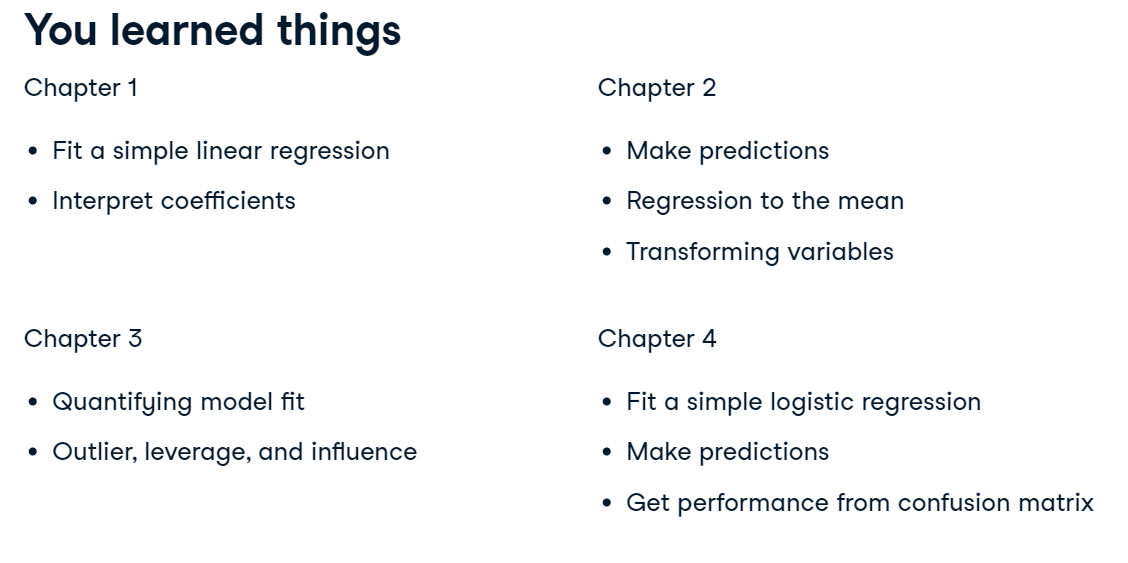

# 1. Simple Linear Regression Modeling

    1. You’ll learn the basics of this popular statistical model, what regression is, and how linear and logistic regressions differ. 
    2. You’ll then learn how to fit simple linear regression models with numeric and categorical explanatory variables,
    3. how to describe the relationship between the response and explanatory variables using model coefficients.
    
Swedish motor insurance data

    Each row represents a region in Sweden, and the two variables are the number of claims made in that region, and the total payment made by the insurance company for those claims, in Swedish krona.
    
Descriptive Statistics

    import pandas as pd
    
    #Get mean
       print(swedish_motor_insurance.mean())
    
    #Get correlation between two var
        print(swedish_motor_insurance["n_claims"].corr(swedish_motor_insurance["total_payment_sek"])
        # 0.91 - strong positive correlation, as x increases, y increases as well
    
What is regression? 

    - class of statistical models that let you explore the relationship between a response variable and some explanatory variables.
    - Given some explanatory variables, you can make predictions about the value of the response variable.
    -In the insurance dataset, if you know the number of claims made in a region, you can predict the amount that the insurance company has to pay out. 
    
Response variable (aka dependent var)
    
    -the one you want to make predictions on

Explanatory (aka independent var) 

    -explain how the predictions will change

Linear regression and logistic regression

    Linear regression - used when the response variable is numeric
    
    Logistic regression - used when the response variable is logical. That is, it takes True or False values. 
    
    Simple linear/logistic regression - Only have a single explanatory variable.
    
7. Visualizing pairs of variables

    Before you start running regression models, it's a good idea to visualize your dataset. 
    
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        sns.scatterplot(x = "n_claims", y = "total_payment_sek", 
                        data = swedish_motor_insurance)
       plt.show()
       
       On the plot, you can see that the total payment increases as the number of claims increases. It would be nice to be able to describe this increase more precisely.

8. Adding a linear trend line

    - A trend line means fitting a line that follows the data points.
    - On seaborn, trend lines are drawn using the regplot() function, which adds a trend line calculated using linear regression.
    
       sns.regplot(x = "n_claims", y = "total_payment_sek", 
                        data = swedish_motor_insurance, ci = Nonescatter_kws={'alpha': 0.5})
       plt.show()
    
 
     Interpretation: The trend line is mostly quite close to the data points, so we can say that the linear regression is a reasonable fit.
     
     
statsmodels vs scikit-learn

    statsmodels - Optimized for insight 
    scikit-learn - Optimized for predicition 

## 1.1 Visualizing numeric

Before you can run any statistical models, it's usually a good idea to visualize your dataset.

Note: The scatter_kws argument, pre-filled in the exercise, makes the data points 50% transparent.

In [2]:
'''

# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()




'''

'\n\n# Import seaborn with alias sns\nimport seaborn as sns\n\n# Import matplotlib.pyplot with alias plt\nimport matplotlib.pyplot as plt\n\n# Draw the scatter plot\nsns.scatterplot(x="n_convenience",\n                y="price_twd_msq",\n                data=taiwan_real_estate)\n\n# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience\nsns.regplot(x=\'n_convenience\',\n         y=\'price_twd_msq\',\n         data=taiwan_real_estate,\n         ci=None,\n         scatter_kws={\'alpha\': 0.5})\n\n# Show the plot\nplt.show()\n\n\n\n\n'

## 1.2 Fitting a linear regression

1. Fitting a linear regression

    -linear regression trend lines in the scatter plots were straight lines. That's a defining feature of a linear regression.
    
2. Straight lines are defined by two things
    
    -Straight line properties
        1. Intercept
            - y value at the point when x is zero  (where x intersect y axis)     
        2. Slope 
            - amouunt the y value increases if you increase by one
            
        Equation: y = intercept + slope*x
        
        Estimating the slope
        
            slope = rise/run
                
                Super slope-estimation! The slope is the rate of change in the y direction divided by the rate of change in the x direction.
                
                A slope of one would mean the y-values increase at exactly the same rate as the x-values, which isn't true here.
                
            intercept = y value when x = 0

Running a model

    from statsmodels.formula.api import ols 
    
    mdl_payment_vs_claims = ols("total_payment_sek ~ n_claims", 
                                data = swedish_motor_insurance)
                                
    mdl_payment_vs_claims = mdl_payment_vs_claims.fit()
    print(mdl_payment_vs_claims.params)
    
Interpreting the model coefficients    

    y = 19.99 + 3.41*n_claims

    - That means that we expect the total payment to be twenty plus three point four times the number of claims. 
    
    - So for every additional claim, we expect the total payment to increase by three point four.

### 1.2.1 Linear regression with ols()

While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Question 1: 

    The model had an Intercept coefficient of 8.2242. What does this mean?
    
        On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

Question 2: 

    The model had an n_convenience coefficient of 0.7981. What does this mean?
    
        If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

In [3]:
'''

# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq~n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

'''

'\n\n# Import the ols function\nfrom statsmodels.formula.api import ols\n\n# Create the model object\nmdl_price_vs_conv = ols("price_twd_msq~n_convenience", data=taiwan_real_estate)\n\n# Fit the model\nmdl_price_vs_conv = mdl_price_vs_conv.fit()\n\n# Print the parameters of the fitted model\nprint(mdl_price_vs_conv.params)\n\n'

The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

### 1.3 Categorical explanatory variables


1. Visualizing 1 numeric and 1 categorical variable

    To visualize the data, scatter plots aren't ideal because species is categorical. Instead, we can draw a histogram for each of the species.
    
    To give a separate panel to each species, I use seaborn's displot function.
    
        import matplotlib.pyplot as plt
        import seaborn as sns
    
        sns.displot(data=fish, x = "mass_g", col = "species", col_wrap 
        plt.show()
    
        It also takes an optional col_wrap argument to specify the number of plots per row. Because the dataset is fairly small, I also set the bins argument to nine.
    
    
2. Summary statistics: mean mass by species
    
        summary_stats = fish.groupby("species")["mass_g"].mean()
        print(summary_stats)
    

3.  Linear regression    

        from statsmodels.formula.api import ols
    
        mdl_mass_vs_species = ols("mass_g ~ species", data = fish).fit()
        print(mdl_mass_vs_species) 
    
        This time we have four coefficients: an intercept, and one for three of the fish species. A coefficient for bream is missing, but the number for the intercept looks familiar.
        
        The intercept is the mean mass of the bream that you just calculated. You might wonder what the other coefficients are, and why perch has a negative coefficient, since fish masses can't be negative.
    

4. Model with an intercept

         mdl_mass_vs_species = ols("mass_g ~ species", data = fish).fit()
         print(mdl_mass_vs_species) 
         
         The coefficients for each category are calculated relative to the intercept. This way of displaying results can be useful for models with multiple explanatory variables, but for simple linear regression, it's just confusing.
         
         By changing the formula slightly to append "plus zero", we specify that all the coefficients should be given relative to zero. Equivalently, it means we are fitting a linear regression without an intercept term
 

5. Model without an intercept 

         mdl_mass_vs_species = ols("mass_g ~ species + 0", data = fish).fit()
         print(mdl_mass_vs_species) 
         
         They are all just the mean masses for each species. This is a reassuringly boring result. When you only have a single, categorical explanatory variable, the linear regression coefficients are simply the means of each category.
         
 

### 1.3.1 Visualizing numeric vs. categorical

If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

In [2]:
'''

# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x="price_twd_msq",
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()


'''

'\n\n# Histograms of price_twd_msq with 10 bins, split by the age of each house\nsns.displot(data=taiwan_real_estate,\n         x="price_twd_msq",\n         col=\'house_age_years\',\n         bins=10)\n\n# Show the plot\nplt.show()\n\n\n'

### 1.3.2 Calculating means by category

A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. 

In [3]:
'''
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)


'''

'\n# Calculate the mean of price_twd_msq, grouped by house age\nmean_price_by_age = taiwan_real_estate.groupby("house_age_years")[\'price_twd_msq\'].mean()\n\n# Print the result\nprint(mean_price_by_age)\n\n\n'

### 1.3.3 Linear regression with a categorical explanatory variable

the means of each category will also be the coefficients of a linear regression model with one categorical variable.

In [5]:
'''

# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

'''

#The coefficients of the model are just the means of each category you calculated previously. 

'\n\n# Update the model formula to remove the intercept\nmdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()\n\n# Print the parameters of the fitted model\nprint(mdl_price_vs_age0.params)\n\n'

# 2. Predictions and model objects

1. Making predictions

        benefit of running models rather than simply calculating descriptive statistics is that models let you make predictions.
        
        
2. The fish dataset: bream

        bream = fishpfish["species"] == "Bream' 
        print(bream.head())


3. Plotting mass vs. length
    
        sns.regplot(x = , y =, data = bream, ci = None)
        plt.show()


4. Running the model 

        mdl_mass_vs_length = ols ("mass_g~length_cm", data = bream).fit()
        print(mdl_mass_vs_length.params)
        
        
5. Data on explanatory values to predict

    Principle:  "if I set the explanatory variables to these values, what value would the response variable have?"
    
        explanatory_data = pd.DataFrame({"length_cm": np.arange(20,41)})

        For this model, the only explanatory variable is the length of the fish. You can specify an interval of values using the np dot arange function, taking the start and end of the interval as arguments. Notice that the end of the interval does not include this value. 
        
        
6. Call predict()

    print(mdl_mass_vs_length.predict(explanatory_data))
    
    
7. Predicting inside a DataFrame

    Having a single column of predictions isn't that helpful to work with. It's easier to work with if the predictions are in a DataFrame alongside the explanatory variables. 
    
    
    prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))


8. Showing predictions

    import matplotlib.pyplot as plt
    import seaborn as sns
    
    fig = plt.figure() #set up overlapping plots
    
    sns.regplot(x = "length", y = "mass", data = bream, ci =None)
    sns.scatterplot(x = "length", y = "mass", data = prediction_data, color = "red", marker = "s")
    
    plt.show()
    
    
9. Extrapolating

        All the fish were between twenty three and thirty eight centimeters, but the linear model allows us to make predictions outside that range. 
        
        To achieve this, you first create a DataFrame with a single observation of 10 cm. You then predict the corresponding mass as before. Wow. The predicted mass is almost minus five hundred grams! This is obviously not physically possible, so the model performs poorly here
        
        little_bream = pd.dataframe({"length_cm" : [10]})
        
        pred_little_bream = little_bream.assign(mdl_mass_vs_length.predict(little_bream))
        print( pred_little_bream) 
        
        
        Extrapolation is sometimes appropriate, but can lead to misleading or ridiculous results. You need to understand the context of your data in order to determine whether it is sensible to extrapolate.

### 2.1 Predicting House prices 

    most useful feature of statistical models like linear regression is that you can make predictions.


    explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
    predictions = model.predict(explanatory_data)
    prediction_data = explanatory_data.assign(response_var=predictions)

In [7]:
'''
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)


'''

"\n# Import numpy with alias np\nimport numpy as np\n\n# Create explanatory_data \nexplanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})\n\n# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq\nprice_twd_msq = mdl_price_vs_conv.predict(explanatory_data)\n\n# Create prediction_data\nprediction_data = explanatory_data.assign(\n    price_twd_msq = price_twd_msq)\n\n# Print the result\nprint(prediction_data)\n\n\n"

In [8]:
'''

# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",data = prediction_data, color = "red")

# Show the layered plot
plt.show()



'''

'\n\n# Create a new figure, fig\nfig = plt.figure()\n\nsns.regplot(x="n_convenience",\n            y="price_twd_msq",\n            data=taiwan_real_estate,\n            ci=None)\n# Add a scatter plot layer to the regplot\nsns.scatterplot(x="n_convenience",\n            y="price_twd_msq",data = prediction_data, color = "red")\n\n# Show the layered plot\nplt.show()\n\n\n\n'

#### 2.1.1 The limits of prediction

you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

In [9]:
'''

# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience" : [-1, 2.5]})


predictions = mdl_price_vs_conv.predict(impossible)
price_twd_msq = impossible.assign(price_twd_msq = predictions)
print(price_twd_msq)

'''

'\n\n# Define a DataFrame impossible\nimpossible = pd.DataFrame({"n_convenience" : [-1, 2.5]})\n\n\npredictions = mdl_price_vs_conv.predict(impossible)\nprice_twd_msq = impossible.assign(price_twd_msq = predictions)\nprint(price_twd_msq)\n\n'

Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

### 2.2 Working with model objects 

1. .params attribute

    
    from statsmodels.formula.api import ols
    mdl_mass_vs_length = ols("mass_g~length_cm", data = bream).fit()
    print(mdl_mass_vs_length)

2. .fittedvalues attribute


    Fitted values: predictions on the original dataset
       
           print(mdl_mass_vs_length.fittedvalues)
    
    or equivalently 
    
           explanatory_data = bream["length_cm"] 
           print(mdl_mas_vs_length.predict(explanatory_data))
           
           
        Fitted values" is jargon for predictions on the original dataset used to create the model. Access them with the fittedvalues attribute. The result is a pandas Series of length thirty five, which is the number of rows in the bream dataset. The fittedvalues attribute is essentially a shortcut for taking the explanatory variable columns from the dataset, then feeding them to the predict function.
        
3. .resid attribute

        "Residuals" are a measure of inaccuracy in the model fit
    
        Like fitted values, there is one residual for each row of the dataset. 
    
        residual: actual response value minus the predicted response value. In this case, the residuals are the masses of breams, minus the fitted values.

4. summary()

In [ ]:
'''

# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

'''

#### 2.2.1 Manually predicting house prices

You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

In [ ]:
'''

# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

'''

### 2.3 Regression to the Mean


Regression to the mean

    Regression to the mean is a property of the data, not a type of model, but linear regression can be used to quantify its effect.
    
    - The concept: response value = fitted value + residual 
    - "The stuff you explained + the stuff you couldn't explain"
    - Residuals exist due to problems in the model and fundamental randomness 
    - Extreme cases are often due to randomness
    - Regression means extrreme cases don't persist over time 

Pearson's father son dataset

    The dataset consists of over a thousand pairs of heights, and was collected as part of a nineteenth century scientific work on biological inheritance. It lets us answer the question, "do tall fathers have tall sons?", and "do short fathers have short sons?".
    
    
Scatter plot

    fig = plt.figure()
    sns.scatterplot(x = "father_height_cm", y = "son_height_cm, data = )
    plt.axline(xy1 = (150,150), slope = 1, linewidth = 2, color = "green")
    
    plt.axis("equal")
    plt.show()
    
    I also used plt dot axis with the 'equal' argument so that one centimeter on the x-axis appears the same as one centimeter on the y-axis. If sons always had the same height as their fathers, all the points would lie on this green line.
    
Adding a regression line

    add a black linear regression line to the plot using regplot. You can see that the regression line isn't as steep as the first line. 
    
    On the left of the plot, the black line is above the green line, suggesting that for very short fathers, their sons are taller than them on average. 
    
    On the far right of the plot, the black line is below the green line, suggesting that for very tall fathers, their sons are shorter than them on average.
    
Running a regression 

    mdl_son_vs-father = ols("son_height~father_height_cm", data= father_son).fit()
    print(mdl_son_vs-father.params)

Make predictions

    really_tall_father = pd.DataFrame({"father_height"; [190]})
    mdl_son_vs_father.predict(really_tall_father)
    
      really_tall_father = pd.DataFrame({"father_height"; [150]})
    mdl_son_vs_father.predict(really_tall_father)
    
    In both cases, the extreme value became less extreme in the next generation — a perfect example of regression to the mean.

Due to regression to the mean, it's common that one player or team that does really well one year, doesn't do as well the next. Likewise players or teams that perform very badly one year do better the next year.

#### 2.3.1 Plotting consecutive portfolio returns

Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

In [14]:
'''

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018", y = "return_2019", data = sp500_yearly_returns)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()



'''

'\n\n# Create a new figure, fig\nfig = plt.figure()\n\n# Plot the first layer: y = x\nplt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")\n\n# Add scatter plot with linear regression trend line\nsns.regplot(x="return_2018", y = "return_2019", data = sp500_yearly_returns)\n\n# Set the axes so that the distances along the x and y axes look the same\nplt.axis("equal")\n\n# Show the plot\nplt.show()\n\n\n\n'

The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

Modeling consecutive returns

Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

In [15]:
'''
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))



'''

'\nmdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()\n\n# Create a DataFrame with return_2018 at -1, 0, and 1 \nexplanatory_data = pd.DataFrame({"return_2018": [-1,0,1]})\n\n# Use mdl_returns to predict with explanatory_data\nprint(mdl_returns.predict(explanatory_data))\n\n\n\n'

Incredible investment predictions! Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

### 2.4 Transforming variables

Transforming variables

    Sometimes, the relationship between the explanatory variable and the response variable may not be a straight line. To fit a linear regression model, you may need to transform the explanatory variable or the response variable, or both of them.
    
It's not a linear relationship

    The upward curve in the mass versus length data prevents us drawing a straight line that follows it closely.
    
Bream vs. perch

    To understand why the bream had a strong linear relationship between mass and length, but the perch didn't, you need to understand your data. 
    
    as bream get bigger, they mostly get longer and not wider. By contrast, the perch on the right has a round body, so I guess that as it grows, it gets fatter and taller as well as longer. 
    
    Since the perches are growing in three directions at once, maybe the length cubed will give a better fit.
    
Modelling mass vs. length cubed

    perch["length_cm_cubed] = perch[length_cm]**3
    
    mdl_perch = ols("mass_g ~ length_cm_cubed", data = perch).fit()
    mdl_perch.params
    
Predicting mass vs.length cubed 

    explanatory_data = pd.DataFrame({"length_cm_cubed": np.arange(10,41,5)**3, "length_cm": np.arange(10,41,5)})
    
    predictions = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))
    print(predictions)

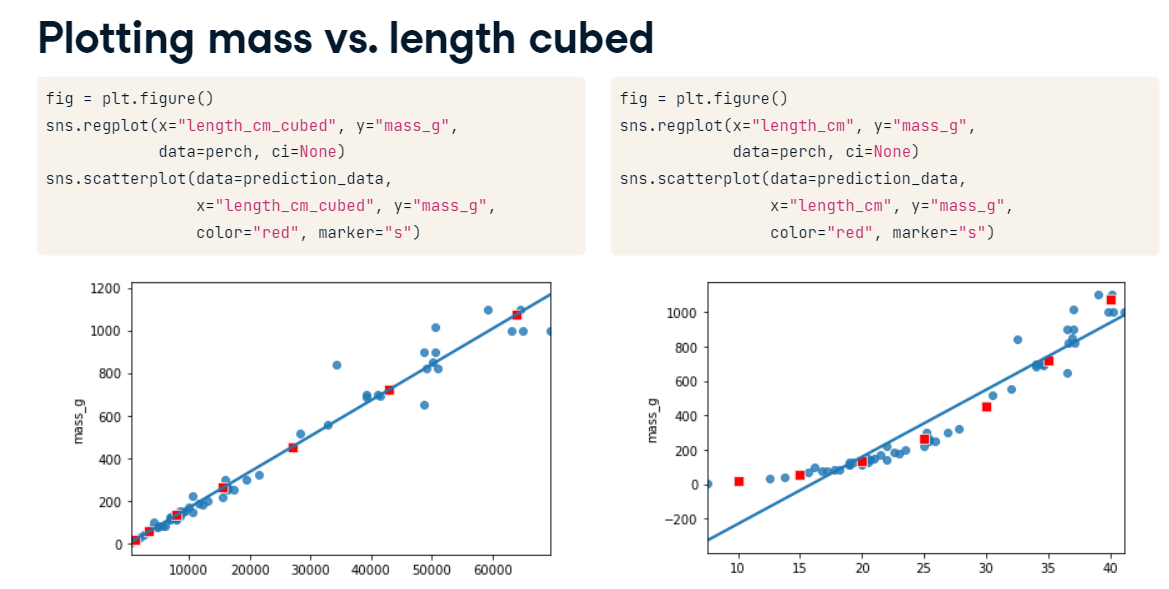

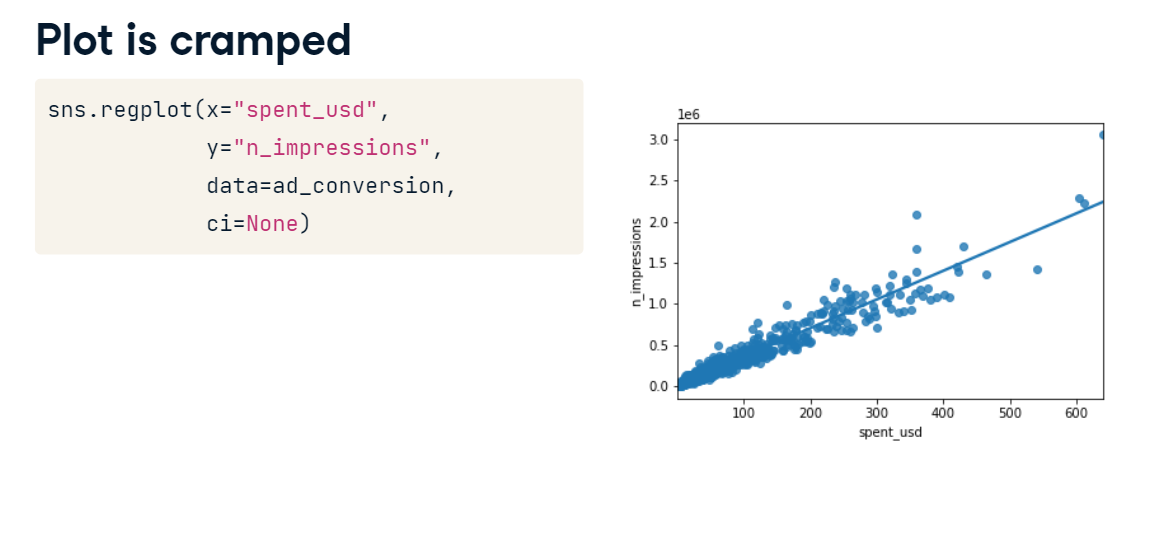
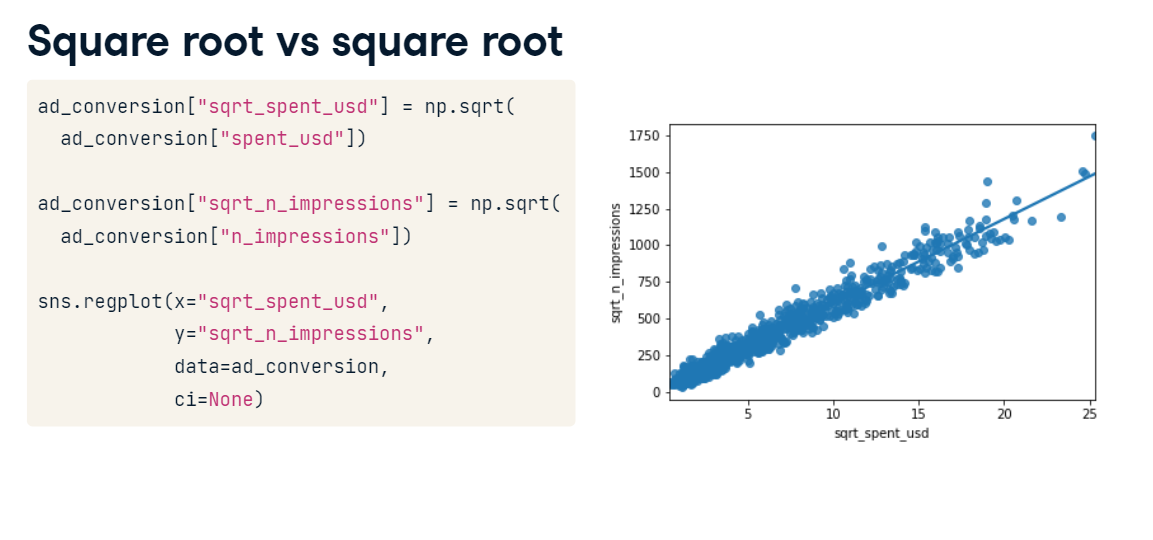

Modelling and predicting 

    mdl_ad = ols("sqrt_n_impressions~sqrt_spent_usd:, data = ad_conversion).fit()
    explanatory_data = pd.DataFrame({"sqrt_spent_usd" : np.sqrt(np.arange(0,601,100)), "spent_usd": np.arange(0,601,100)})
    
    
    prediction_data = explanatory_data.assign(sqrt_n_impressions = mdl_ad.predict(explanatory_data), 
                n_impressions = mdl_ad.predict(explanatory_data)**2)
                
    print(prediction_data)
    
    Prediction requires an extra step. Because we took the square root of the response variable (not just the explanatory variable), the predict function will predict the square root of the number of impressions. That means that we have to undo the square root by squaring the predicted responses. Undoing the transformation of the response is called back transformation.


##### 2.4.1 Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

In [16]:
'''# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x = 'sqrt_dist_to_mrt_m' , y = 'price_twd_msq', data = prediction_data, color='red')
plt.show()'''

'# Create sqrt_dist_to_mrt_m\ntaiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])\n\n# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m\nmdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()\n\n# Use this explanatory data\nexplanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),\n                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})\n\n# Use mdl_price_vs_dist to predict explanatory_data\nprediction_data = explanatory_data.assign(\n    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)\n)\n\nfig = plt.figure()\nsns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)\n\n# Add a layer of your prediction points\nsns.scatterplot(x = \'sqrt_dist_to_mrt_m\' , y = \'price_twd_msq\', data = prediction_data, color=\'red\')\nplt.show()'

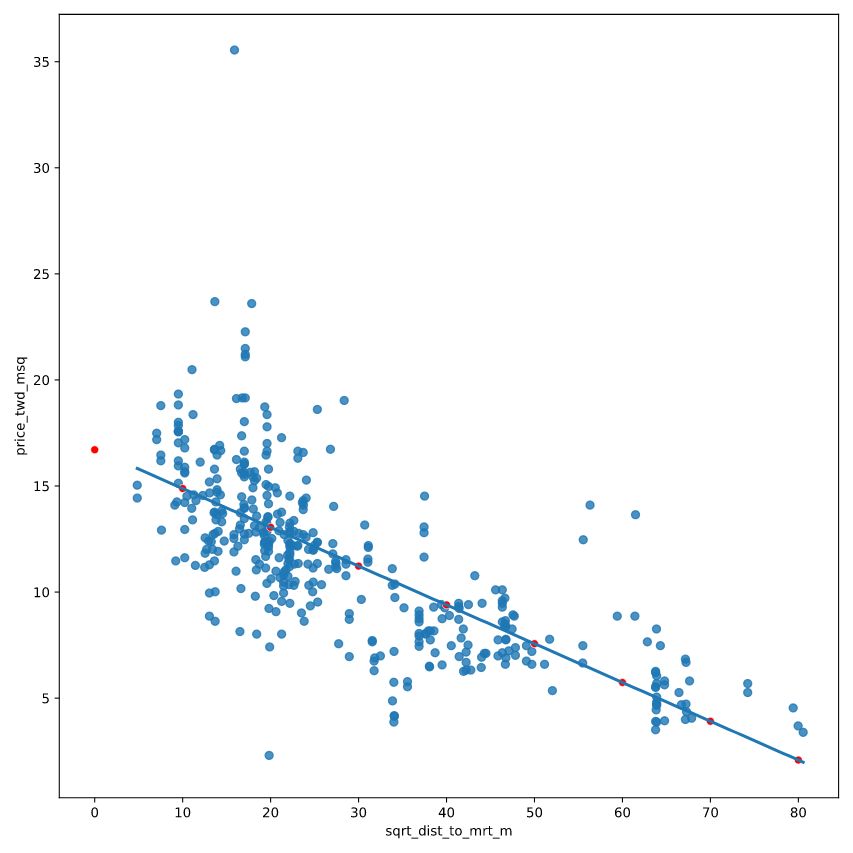

By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

##### 2.4.2 Transforming the response variable too


The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In [17]:
'''ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)'''

'ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25\nad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25\n\nmdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()\n\nexplanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,\n                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})\n\n# Complete prediction_data\nprediction_data = explanatory_data.assign(\n    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)\n)\n\n# Print the result\nprint(prediction_data)'

##### 2.4.3 Back transformation

In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

In [19]:
'''
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x= 'qdrt_n_impressions', y ='qdrt_n_clicks', data = prediction_data, color='red')
plt.show()

'''

'\n# Back transform qdrt_n_clicks\nprediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4\n\n# Plot the transformed variables\nfig = plt.figure()\nsns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)\n\n# Add a layer of your prediction points\nsns.scatterplot(x= \'qdrt_n_impressions\', y =\'qdrt_n_clicks\', data = prediction_data, color=\'red\')\nplt.show()\n\n'

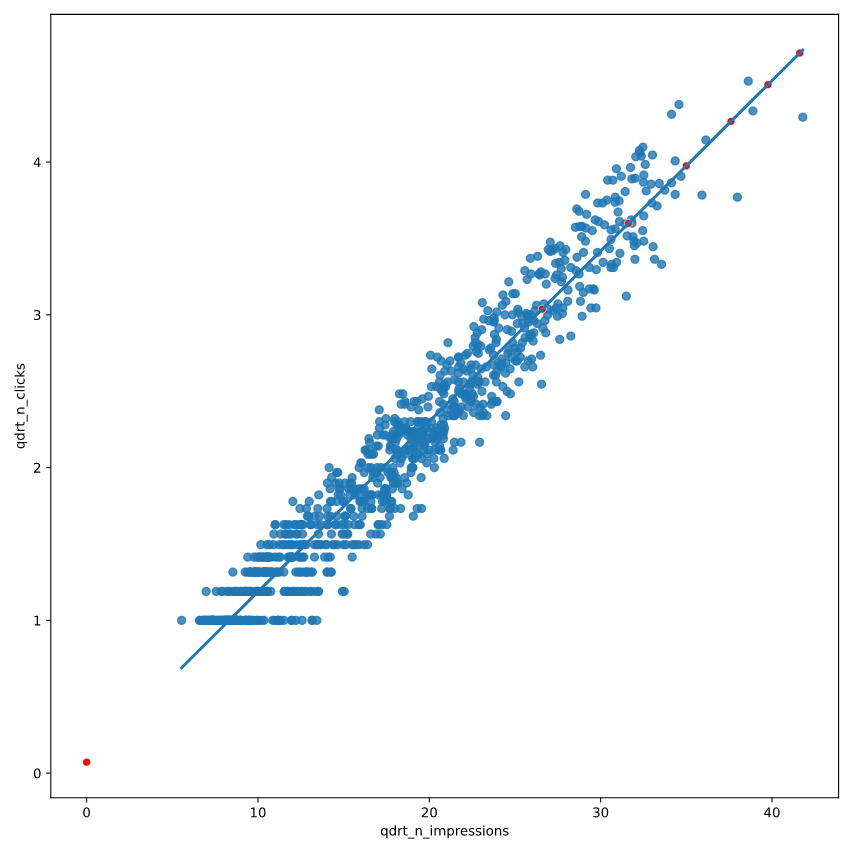

Notice that your back-transformed predictions nicely follow the trend line and allow you to make more accurate predictions.

# 3. Assessing Model Fit 


1. Quantifying model fit

        Essential to know whether or not predictions from your model are nonsense. 
        

2. Bream and perch models

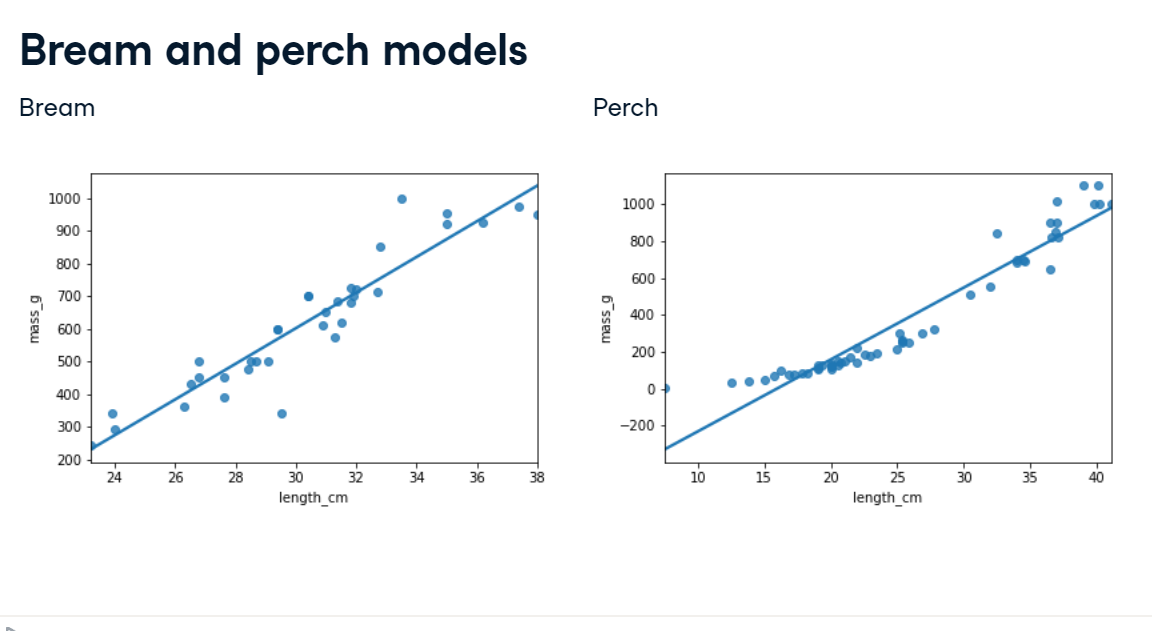

    There is a linear relationship between mass and length for bream but not for perch. 
    It would be useful to quantify how strong that linear relationship is.

3. Coefficient of determination

       - sometimes called "r-squared" or R-squared
       - it's written with a lower case r for simple linear regression and an upper case R when you have more than one explanatory variable.
       - the proportion of the variance in the response variable that is predictable from the explanatory variable.
           
           1 - Perfect fit
           0 - worst possible fit - no better than randomness. 
           
       - What constitutes a good score depends on your dataset. A score of zero-point five on a psychological experiment may be exceptionally high because humans are inherently hard to predict, but in other cases, a score of zero-point nine may be considered a poor fit.

4. .summary()

        mdl_bream = ols("mass_g ~ length_cm", data = bream).fit()
        print(mdl_bream.summary())
    
5. .rsquared attribute

         print(mdl_bream.rsquared)
 
6. It's just correlation squared
        
        coeff_determination) = bream["length_cm"].corr(bream["mass_g"])**2
        print(coeff_determination)


        For simple linear regression, the interpretation of the coefficient of determination is straightforward. It is simply the correlation between the explanatory and response variables, squared.
        
        
7. Residual standard error (RSE)

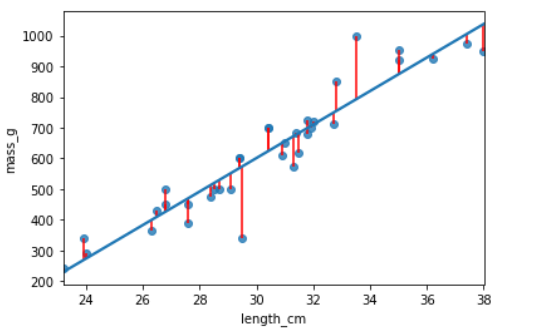

        - Predicted value - Observed value.
        - The RSE is, very roughly speaking, a measure of the typical size of the residuals. That is, how much the predictions are typically wrong. 
        - Same unit as the response variable.
        - MSE = RSE ** 2 

8. .mse_resid attribute

        mse = mdl_bream.mse_resid
        print('mse: ', mse)
        
        rse = np.sqrt(mse)
        print('rse: ', rse)
     

        -The summary method unfortunately doesn't contain the RSE. 
        - However, it can indirectly be retrieved from the mse_resid attribute, which contains the mean squared error of the residuals. 
        - We can calculate the RSE by taking the square root of MSE. 
        - As such, the RSE has the same unit as the response variable. The RSE for the bream model is about seventy-four.
        
9. Calculating RSE: residuals squared
        
        - To calculate the RSE yourself, it's slightly more complicated. First, you take the square of each residual.
        
10. Calculating RSE: sum of residuals squared

        take the sum of these residuals squared.
        
11. Calculating RSE: degrees of freedom

        - calculate the degrees of freedom of the residuals. 
        - Number of observations minus the number of model coefficients.

12. Calculating RSE: square root of ratio
        
        -  take the square root of the ratio of those two numbers. Reassuringly, the value is still seventy-four.
        
13. Interpreting RSE
        -An RSE of seventy-four means that the difference between predicted bream masses and observed bream masses is typically about seventy-four grams.

14. Root-mean-square error (RMSE)

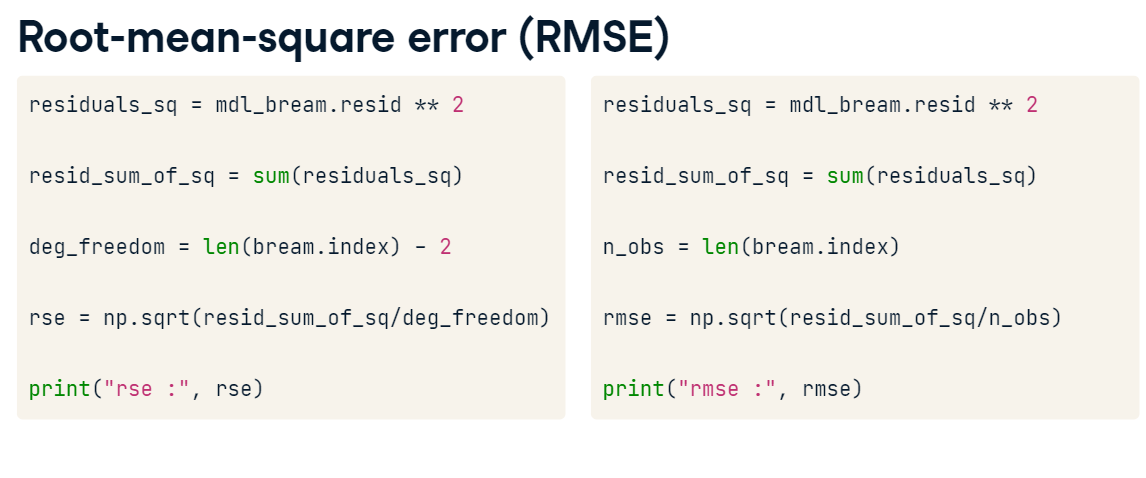
    
         calculated in the same way, except you don't subtract the number of coefficients in the second to last step. It performs the same task as residual standard error, namely quantifying how inaccurate the model predictions are, but is worse for comparisons between models. You need to be aware that RMSE exists, but typically you should use RSE instead.

## 3.1 Coefficient of Determination 

    The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.
    
    mdl_click_vs_impression_orig has a coefficient of determination of 0.89. Which statement about the model is true?
    
        The number of impressions explains 89% of the variability in the number of clicks.
        The transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.
    
    

## 3.2 Residual Standard Error (RSE)

    - measure of the typical size of the residuals. 
    - Equivalently, it's a measure of how wrong you can expect predictions to be 
    - Smaller numbers are better, with zero being a perfect fit to the data.

In [1]:
'''

# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

'''

'\n\n# Calculate mse_orig for mdl_click_vs_impression_orig\nmse_orig = mdl_click_vs_impression_orig.mse_resid\n\n# Calculate rse_orig for mdl_click_vs_impression_orig and print it\nrse_orig = np.sqrt(mse_orig)\nprint("RSE of original model: ", rse_orig)\n\n# Calculate mse_trans for mdl_click_vs_impression_trans\nmse_trans = mdl_click_vs_impression_trans.mse_resid\n\n# Calculate rse_trans for mdl_click_vs_impression_trans and print it\nrse_trans = np.sqrt(mse_trans)\nprint("RSE of transformed model: ", rse_trans)\n\n'

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722

    The typical difference between observed number of clicks and predicted number of clicks is 20.
    
Which model does the RSE suggest gives more accurate predictions? mdl_click_vs_impression_orig has an RSE of about 20, mdl_click_vs_impression_trans has an RSE of about 0.2.

    The transformed model, mdl_click_vs_impression_trans
    
    RSE is a measure of accuracy for regression models. It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.

## 3.3 Visualizing Model Fit

1. Visualizing model fit

        -Several plots can quantify the performance of a model.
        
2. Residual properties of a good fit

        If a linear regression model is a good fit: 
        
            1. The residuals are approximately normally distributed
            2. mean of the residuals  zero.
        
3. Bream and perch again

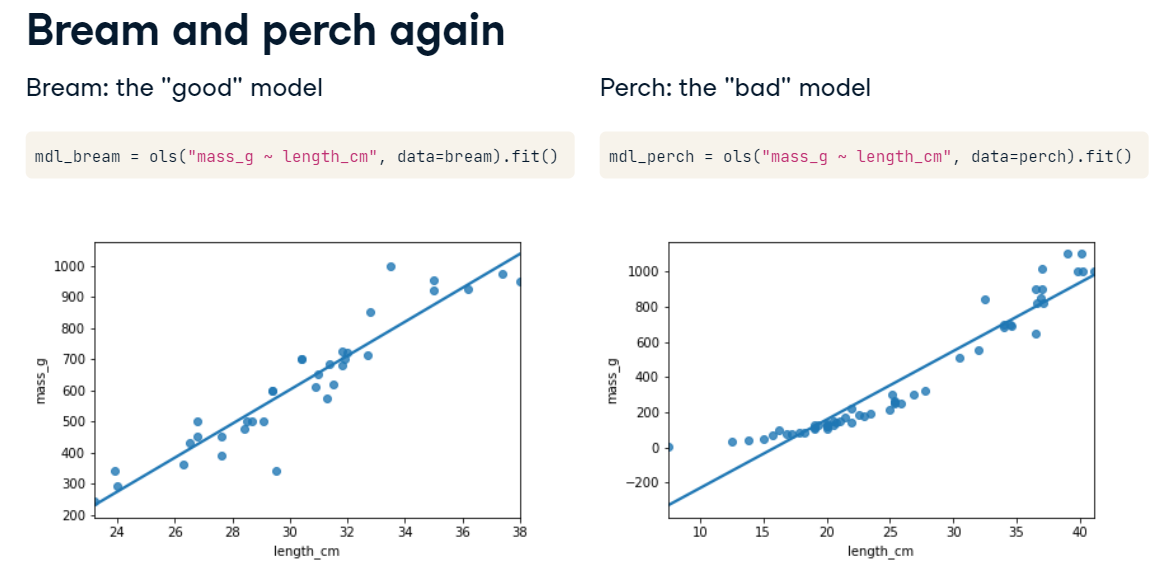

         From looking at the scatter plots with linear trend lines, it appeared that the bream model was a good fit, but the perch model wasn't because the observed masses increased faster than linearly with the lengths.

4. Residuals vs. fitted

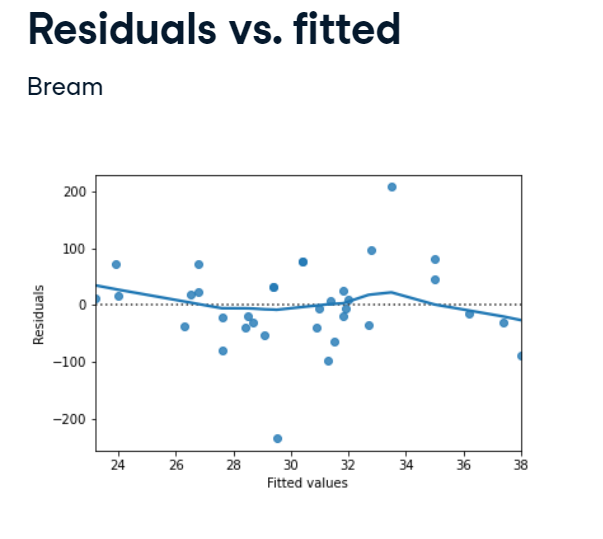

        The blue line is a LOWESS trend line, which is a smooth curve following the data. These aren't good for making predictions but are useful for visualizing trends. 
        
        If residuals met the assumption that they are normally distributed with mean zero, then the trend line should closely follow the y equals zero line on the plot. For the bream dataset, this is true.
        
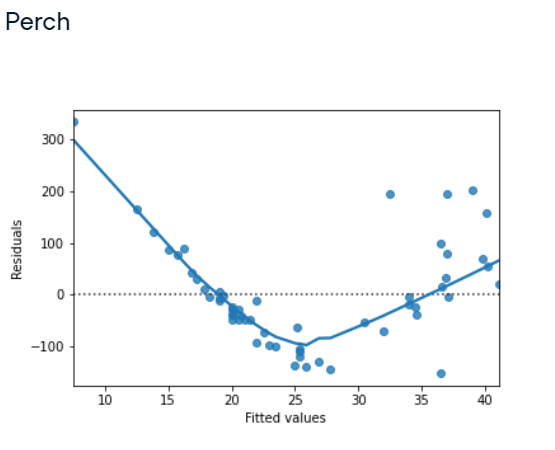

        By contrast, the perch model doesn't meet the assumption. The residuals are above zero when the fitted value is small or big and below zero in the middle.
        
5. Q-Q plot

        shows whether or not the residuals follow a normal distribution. 
        
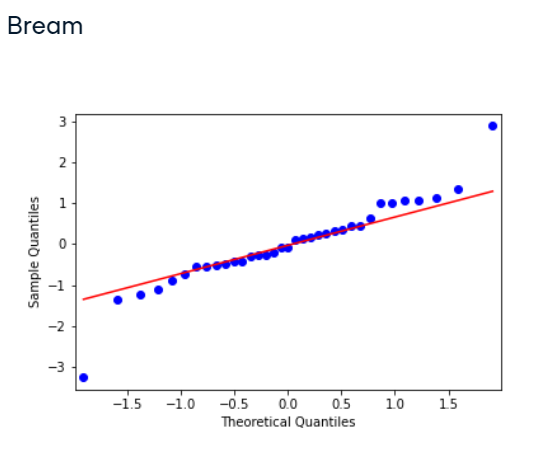
            
        On the x-axis, the points are quantiles from the normal distribution. On the y-axis, you get the sample quantiles, which are the quantiles derived from your dataset. 
       
       If the points track along the straight line, they are normally distributed. If not, they aren't. Two points at each extreme don't follow the line. These correspond to the rows of the bream dataset with the highest residuals.

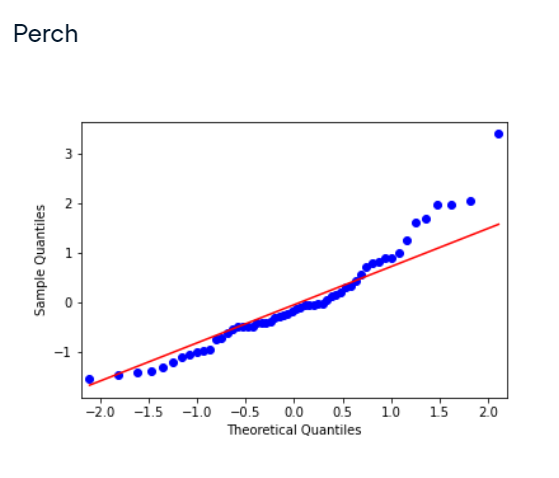

        The perch dataset doesn't track the line as closely. In particular, you can see on the right-hand side of the plot that the residuals are larger than expected. That means the model is a particularly poor fit for the longer lengths of perch.
        
6. Scale-location plot

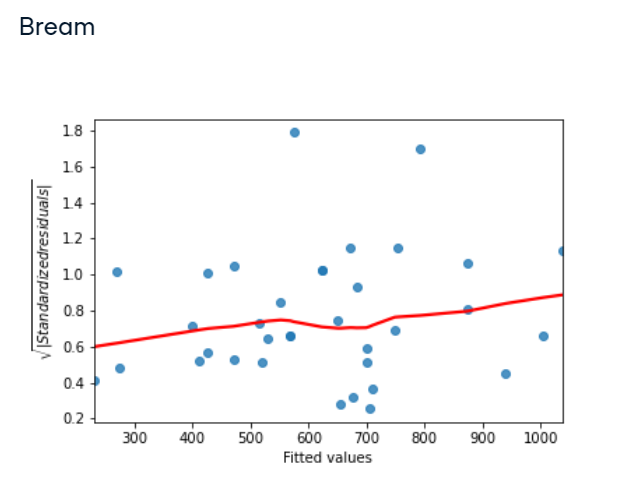

        shows the square root of the standardized residuals versus the fitted values. 
        
        Where the first plot showed whether or not the residuals go positive or negative as the fitted values change, this plot shows whether the size of the residuals gets bigger or smaller. 
        
        The residuals for the bream dataset get a little bigger as the fitted values increase, but it's not a huge change. 
        
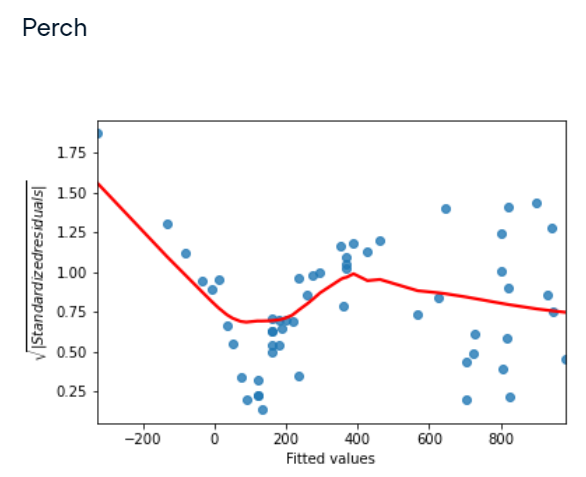

           Again, the plot of the perch model has a trend line that goes up and down all over the place, indicating a poor fit.
           
7. residplot()

        sns.residplot(x="length_cm"m y = "mass_g", data = bream, lowess = True)
        plt.xlabel("Fitted Values")
        plt.ylabel("Residuals")
        
        lowess argument: adds a smooth curve following the data, visualizing the trend of your residuals.
        
8. qqplot()

        from statsmodels.api import qqplot
        qqplot(data=mdl_bream.resid, fit = True, line = "45")
        
        
         You set the residuals of the model as your data argument and the fit argument to True. This will compare the data quantiles to a normal distribution. The last argument is optional, but when set to "45", set as a string, it will draw a 45-degree line on your plot, making it easier to interpret the pattern.
         
9. Scale-location plot

        The last plot, scale-location, requires a bit more preprocessing.
        
        You first need to extract the normalized residuals from the model, which you can get by using the get_influence method, then accessing the resid_studentized_internal attribute. 
        
            model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
        
        You then take the absolute values and take the square root of these normalized residuals to standardize them. 
        
            model_norm_residuals_abs_sqrt_ bream = np.sqrt(np.abs(model_norm_residuals_bream)))

    
        Next, you can call sns dot regplot, passing in mdl_bream dot fittedvalues for x, and the standardized residuals for y. Again, you can also include a lowess argument to make interpretation easier. Lastly, you specify the axes manually.
        
             sns.residplot(x=mdl_bream.fittedvalues, y = model_norm_residuals_abs_sqrt_bream, data = ci, lowess = True)
             plt.xlabel("Fitted values")
             plt.ylabel("Sqrt of abs val of stdized residuals")

        
        

### 3.3.1  Residuals vs. fitted values

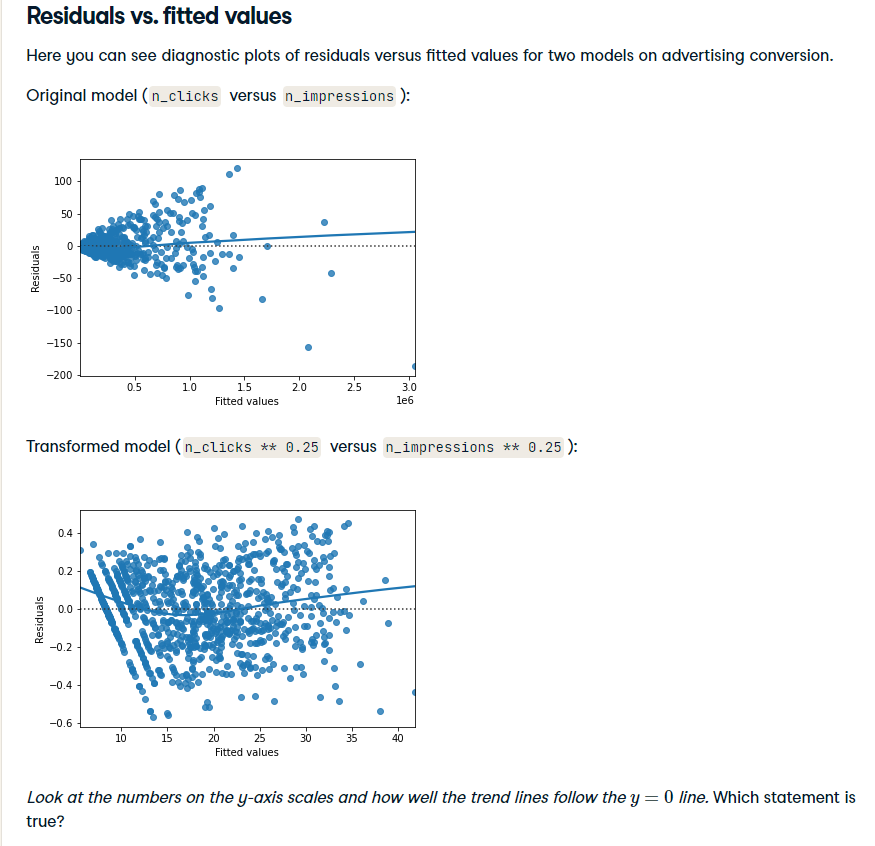

    The residuals track the y = 0 line more closly in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data

    In a good model, the residuals should have a trend line close to zero.

### 3.3.2  QQ-plot

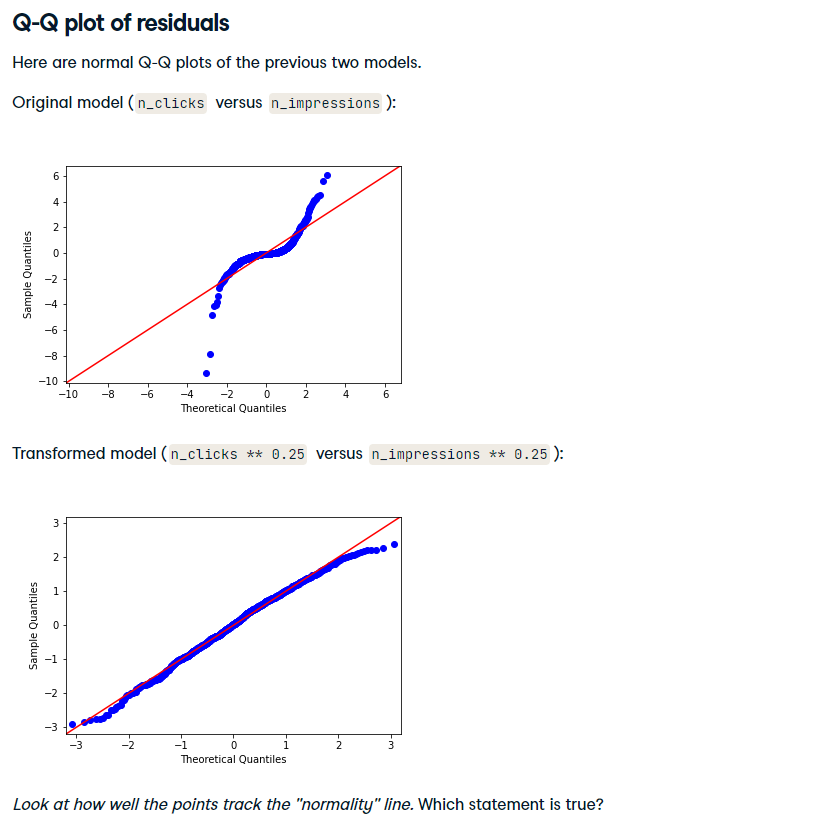

Answers: 

    The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.
    
    If the residuals from the model are normally distributed, then the points will track the line on the Q-Q plot. In this case, neither model is perfect, but the transformed model is closer.

### 3.3.3  Scale-location

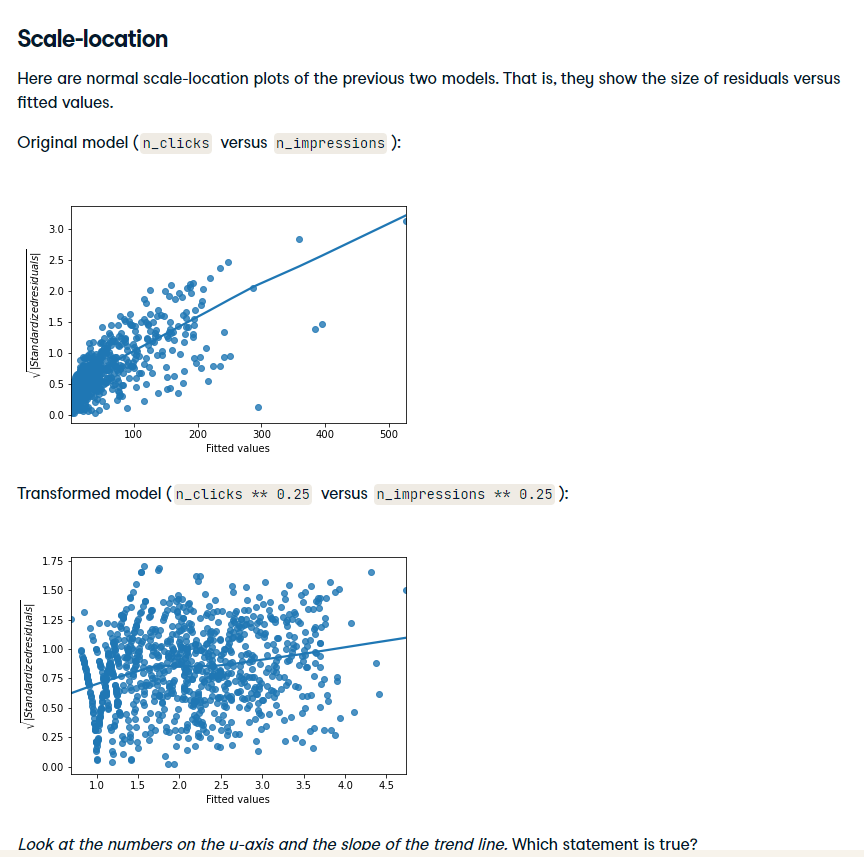

    The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.
    
     In a good model, the size of the residuals shouldn't change much as the fitted values change.


### 3.3.4 Drawing diagnostic plots

It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

In [5]:
# Create the residuals versus fitted values plot. 
# Add a lowess argument to visualize the trend of the residuals.

'''
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y='price_twd_msq', data=taiwan_real_estate, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()
'''

'\n# Plot the residuals vs. fitted values\nsns.residplot(x="n_convenience", y=\'price_twd_msq\', data=taiwan_real_estate, lowess = True)\nplt.xlabel("Fitted values")\nplt.ylabel("Residuals")\n\n# Show the plot\nplt.show()\n'

In [6]:
'''# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()'''

'# Import qqplot\nfrom statsmodels.api import qqplot\n\n# Create the Q-Q plot of the residuals\nqqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")\n\n# Show the plot\nplt.show()'

In [7]:
'''

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=____.____, y=____, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()


'''

'\n\n# Preprocessing steps\nmodel_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal\nmodel_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))\n\n# Create the scale-location plot\nsns.regplot(x=____.____, y=____, ci=None, lowess=True)\nplt.xlabel("Fitted values")\nplt.ylabel("Sqrt of abs val of stdized residuals")\n\n# Show the plot\nplt.show()\n\n\n'

In [8]:
'''

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()


'''

'\n\n# Preprocessing steps\nmodel_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal\nmodel_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))\n\n# Create the scale-location plot\nsns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)\nplt.xlabel("Fitted values")\nplt.ylabel("Sqrt of abs val of stdized residuals")\n\n# Show the plot\nplt.show()\n\n\n'

### 3.3.5 Outliers, leverage, and influence

1. Outliers, leverage, and influence

        datasets contain unusual values. We'll look at how to spot them and the consequences they have for your regression models.

2. Roach dataset

        roach = fish[fish["species"] == "Roach"]
        print(roach.head())

3. Which points are outliers?

        sns.regplot(x = "length_cm", y = "mass_g", data = roach, ci = None)
        plt.show()

4. Extreme explanatory values

        The first kind of outlier is when you have explanatory variables that are extreme. In the simple linear regression case, it's easy to find and visualize them. There is one extreme short roach and one extreme long roach that I've colored orange here.
        
        roach["extreme_l"] = ((roach["length_cm"] < 15) | ((roach["length_cm"] > 26))
        
        fig= plt.figure()
        sns.regplot(x="length_cm", y = "mass_g", data = roach, ci = None)
        sns.scatterplot(x="length_cm", y = "mass_g", hue = "extreme_l", data = roach)
        

5. Response values away from the regression line

        The other property of outliers is when the point lies a long way from the model predictions. Here, there's a roach with mass zero, which seems biologically unlikely. It's shown as a cross.
        
        roach["extreme_m"] = roach["mass_g"] < 1
        
        fig= plt.figure()
        sns.regplot(x="length_cm", y = "mass_g", data = roach, ci = None)
        sns.scatterplot(x="length_cm", y = "mass_g", hue = "extreme_l", style = "extreme_m" data = roach)

6. Leverage and influence

        Leverage - how extreme your explanatory variable values are.
        
            a. measures the first type of outlier we discussed.
            b. With one explanatory variable, you can find the values by filtering, but with many explanatory variables, the mathematics is more complicated. 
            
         Influence - measures how much the model would change if you left the observation out of the dataset when modeling. This is a type of "leave one out" metric. That is, it measures how much the model would change if you reran it without that data point.

7. .get_influence() and .summary_frame()

        mdl_roach = ols("mass_g~length_cm", data = roach).fit()
        summary_roach = mdl_roach.get_influence().summary_frame()
        
        roach["leverage"] = summary_roach["hat_diag"]

8. Cook's distance

          Most common measure of influence
          roach["cooks_dist"] = summary_roach["cooks_d"]
            
            
9. Most influential roaches

            print(roach.sort_values("cooks_dist", ascending = False)

10. Removing the most influential roach

        roach_not_short = roach[roach["length_cm"] != 12.9]
        sns.regplot(x="length_cm", y = "mass_g", data = roach, ci = None, line-kws = {"color":"green"})
        
           sns.regplot(x="length_cm", y = "mass_g", data = roach_not_short, ci = None, line_kws = {"color":"red"})
        

Summary

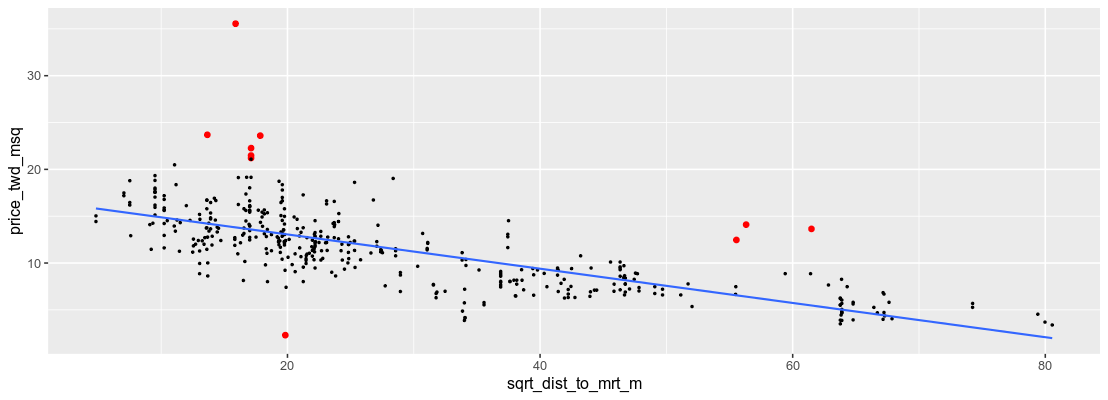

Impressive influence interpretation! The majority of the influential houses were those with prices that were much higher than the model predicted (and one with a price that was much lower).

        

In [1]:
'''

# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending = False).head())

'''

'\n\n# Create summary_info\nsummary_info = mdl_price_vs_dist.get_influence().summary_frame()\n\n# Add the hat_diag column to taiwan_real_estate, name it leverage\ntaiwan_real_estate["leverage"] = summary_info["hat_diag"]\n\n# Add the cooks_d column to taiwan_real_estate, name it cooks_dist\ntaiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]\n\n# Sort taiwan_real_estate by cooks_dist in descending order and print the head.\nprint(taiwan_real_estate.sort_values("cooks_dist", ascending = False).head())\n\n'

Delightful outlier diagnosing! Leverage and influence are important concepts for determining whether your model is overly affected by some unusual data points.

# 4. Logistic Regression 

1. Why you need logistic regression
    
        binary response variable
        
2. Bank churn dataset
        
        1 - Closed account during the time period
        0 - Open account 
        Advantages: plotting code easier
       
3. Churn vs. recency: a linear model

        mdl_churn_vs_recency_lm = ols("has_churned~time_since_last_purchase", data = churn).fit()
        print(mdl_churn_vs_recency_lm.params)
        
4. Visualizing the linear model

        sns.scatterplot(x="time_since_last_purchase", y = "has_churned", data = churn)
        plt.axline(xy1=(0, intercept), slope = slope)
        plt.show()
        
5. Zooming out

        setting axis limits with xlim and ylim shows the problem with using a linear model. In the bottom-left of the plot, the model predicts negative probabilities. In the top-right, the model predicts probabilities greater than one. Both situations are impossible.
        
        plt.xlim(-10,10)
        plt.ylim(-0.2,1.2)
        plt.show()
        
6. What is logistic regression?

        - type of generalized linear model
        - used when the response variable is logical. 
        - Whereas linear models result in predictions that follow a straight line, logistic models result in predictions that follow a logistic curve, which is S-shaped.
        
        
7. Logistic regression using logit()

        from statsmodels.formula.api import logit 
        mdl_churn_vs_recency_logit = logit("has_churned~ time_since_last_purchase", data = churn).fit()
        print(mdl_churn_vs_recency_logit.params)


8. Visualizing the logistic model
      
         sns.regplot(x="time_since_last_purchase", y = "has_churned", data = churn, ci = None, logistic = True)
         
          plt.axline(xy1=(0, intercept), slope = slope, color = "black")

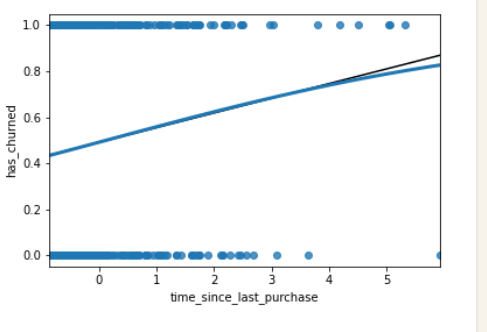
        

9. Zooming out

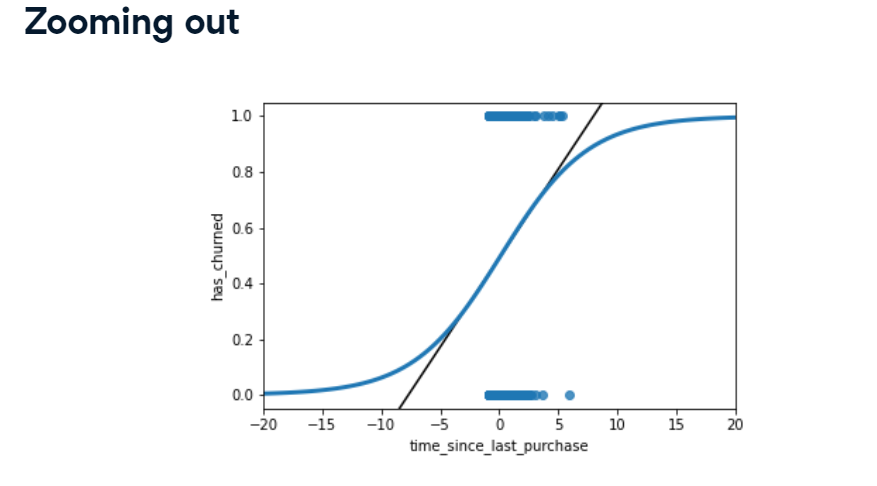

        -never goes below zero or above one. 
        
        - To interpret this curve, when the standardized time since last purchase is very small, the probability of churning is close to zero. When the time since last purchase is very high, the probability is close to one. 
        - That is, customers who recently bought things are less likely to churn.

## 4.1 Exploring the explanatory variables

When the response variable is logical, all the points lie on the y = 0 and y = 1 lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

In [2]:
'''

# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x = "time_since_last_purchase", col= "has_churned", data = churn, bins =10)

plt.show()


'''

'\n\n# Create the histograms of time_since_last_purchase split by has_churned\nsns.displot(x = "time_since_last_purchase", col= "has_churned", data = churn, bins =10)\n\nplt.show()\n\n\n'

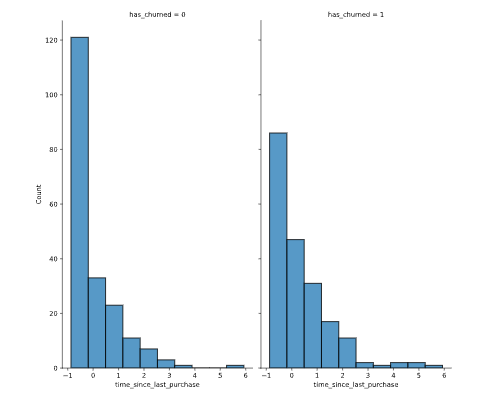

In [3]:
'''
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn,
            x="time_since_first_purchase",
            col="has_churned")

plt.show()


'''

'\n# Redraw the plot with time_since_first_purchase\nsns.displot(data=churn,\n            x="time_since_first_purchase",\n            col="has_churned")\n\nplt.show()\n\n\n'

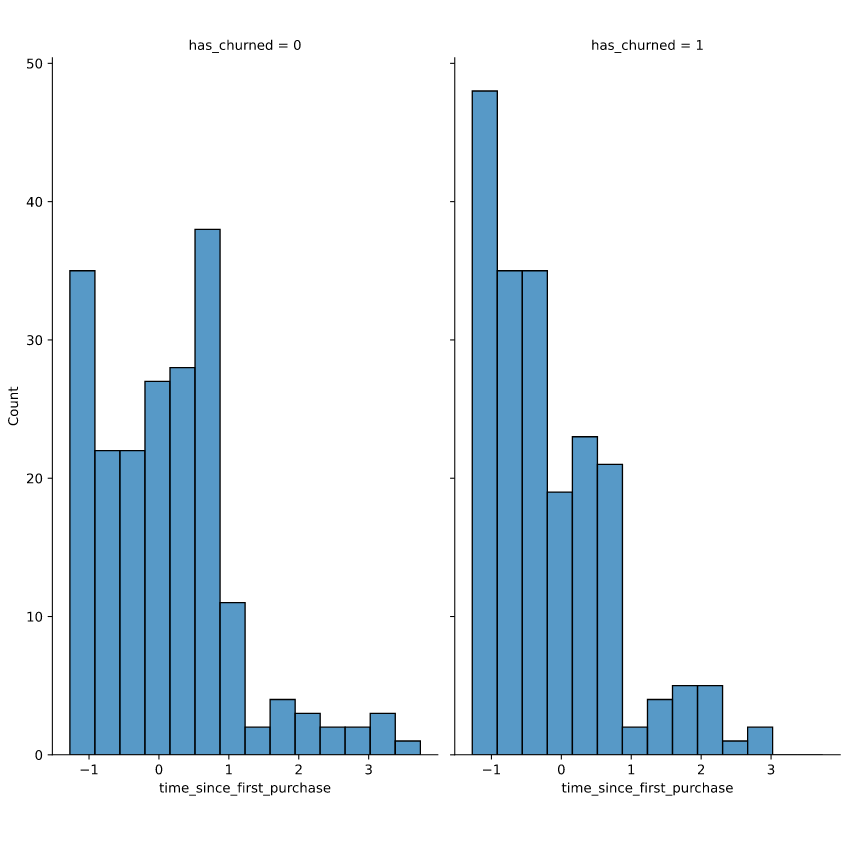

## 4.2 Visualizing linear and logistic models

As with linear regressions, regplot() will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. 

To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side.

Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

In [4]:
'''

# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x = "time_since_first_purchase", y= "has_churned",data = churn, ci =None, logistic =True, line_kws = {"color":"blue"})

plt.show()


'''

'\n\n# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned\nsns.regplot(x="time_since_first_purchase",\n            y="has_churned",\n            data=churn, \n            ci=None,\n            line_kws={"color": "red"})\n\n# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned\nsns.regplot(x = "time_since_first_purchase", y= "has_churned",data = churn, ci =None, logistic =True, line_kws = {"color":"blue"})\n\nplt.show()\n\n\n'

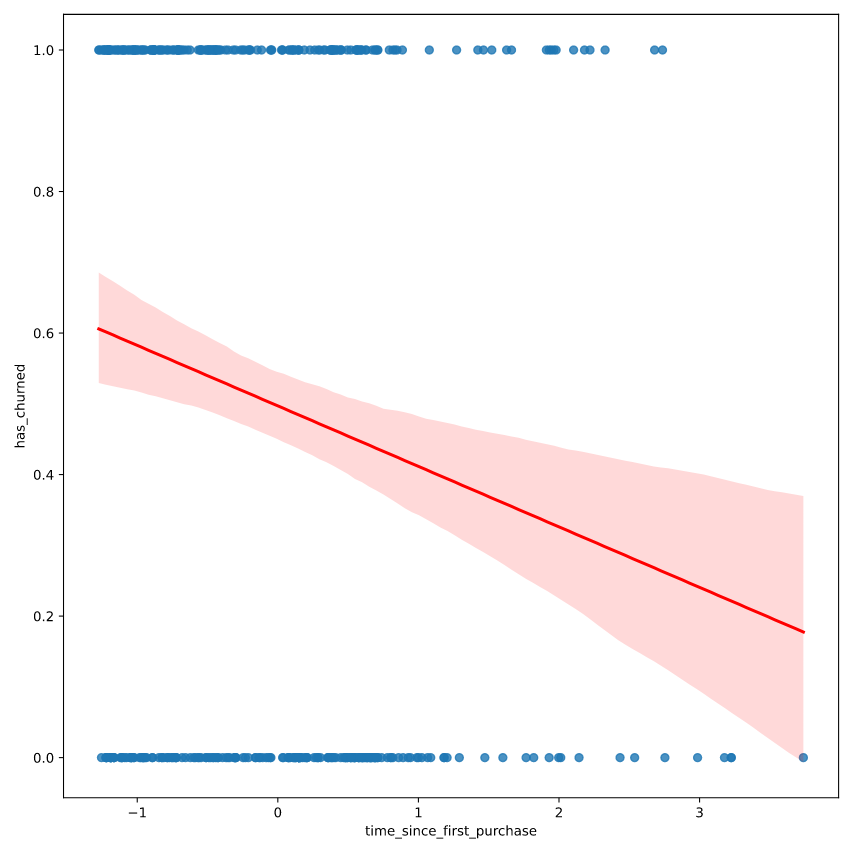
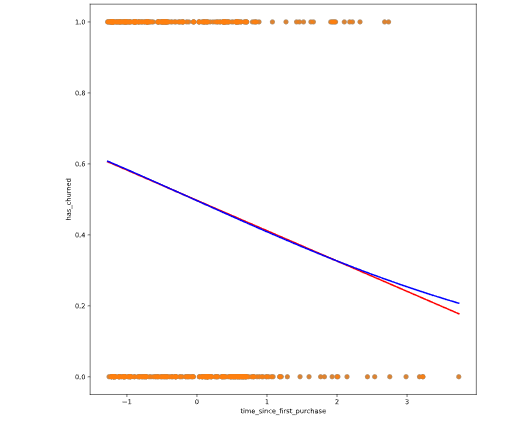

The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

## 4.3 Logistic regression with logit()

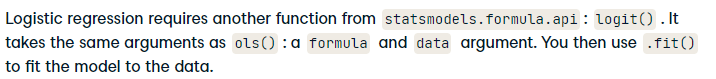

In [5]:
'''
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned~time_since_first_purchase", data = churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

'''

'\n# Import logit\nfrom statsmodels.formula.api import logit\n\n# Fit a logistic regression of churn vs. length of relationship using the churn dataset\nmdl_churn_vs_relationship = logit("has_churned~time_since_first_purchase", data = churn).fit()\n\n# Print the parameters of the fitted model\nprint(mdl_churn_vs_relationship.params)\n\n'

## 4.4 Predictions and odds ratios

2. The regplot() predictions

        regplot will give you a logistic regression trend line.

3. Making predictions

        To make a prediction with a logistic model, you use the same technique as for linear models. Create a DataFrame of explanatory variable values. Then add a response column calculated using the predict method.
        
        mdl_recency = logit("has_churned~time_since_last_purchase", data= churn).fit()
        
        explanatory_data = pd.DataFrame({'time_since_last_purchase" : np.arange(-1,6.25,0.250})
        prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))
        
4. Adding point predictions        
        
        
        sns_regplot(x="", y = "", data = churn, ci = None, logistic = True)
        sns.scatterplot(x="", y= "", data = prediction_data, color = "red")
        plt.show()
        
5. Getting the most likely outcome

        - One simpler prediction you can make, rather than calculating probabilities of a response, is to calculate the most likely response.
        
        - if the probability of churning is less than 0-point-5, the most likely outcome is that they won't churn. If their probability is greater then 0-point-5, it's more likely that they will churn.
        
       prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))
       prediction_data["most_likely_outcome"] =  np.round(prediction_data["has_churned"])

6. Visualizing most likely outcome

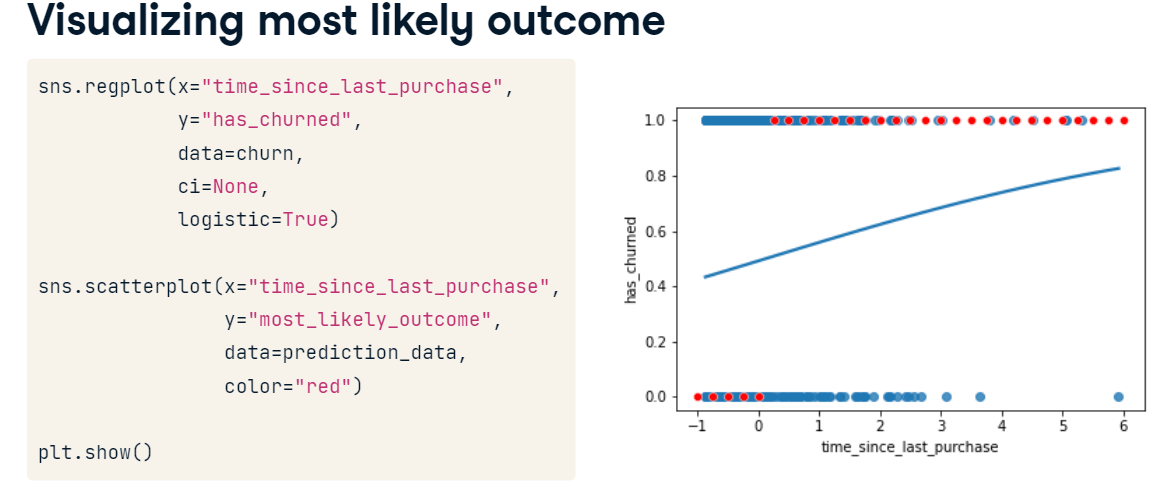
      
          For recently active customers, the most likely outcome is that they don't churn. Otherwise, the most likely outcome is that they churn.
          
7. Odds ratios
    
          The odds ratio is the probability that something happens, divided by the probability that it doesn't.
          
8. Calculating odds ratio

    prediction_data['odds_ratio"] = prediction_data["has_churned"]/(1-prediction_data["has_churned"])
    
9. Visualizing odds ratio    

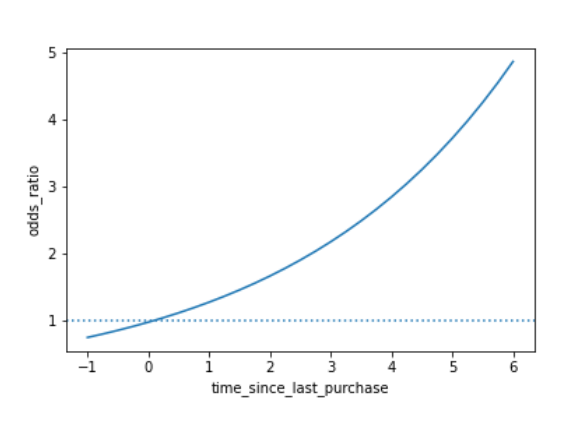

    sns_lineplot(x=" ", y= "", data =prediction_data)
    
    plt.axhline(y = 1, linestyle = "dotted"
    
    plt.yscale("log")
    plt.show()
    
    Here, the dotted line where the odds ratio is one indicates where churning is just as likely as not churning. This has been added by using the axhline function. 
    
    In the bottom-left, the predictions are below one, so the chance of churning is less than the chance of not churning. In the top-right, the chance of churning is about five times more than the chance of not churning.
    
10. Visualizing log odds ratio

        they change linearly with the explanatory variable. This plot adds a logarithmic y scale.
    
        sns.lineplot(x="", y = "", data = prediction_data)
        plt.axhline(y=1, linestyle ="dotted") 
        plt.yscale("log")
        plt.show()
        
 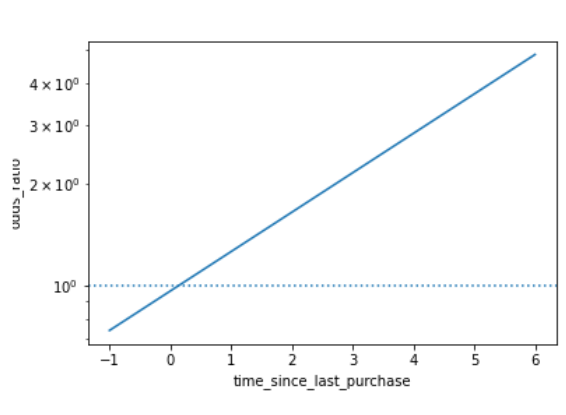
 
11. Calculating log odds ratio

        prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])
        
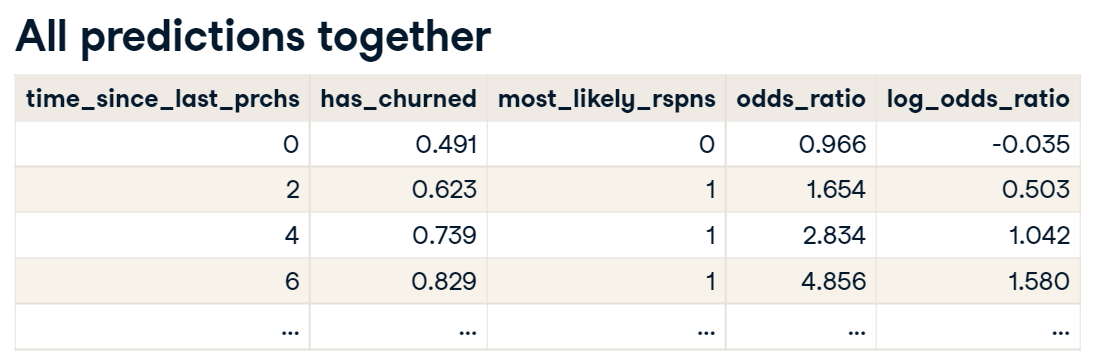

13. Comparing scales

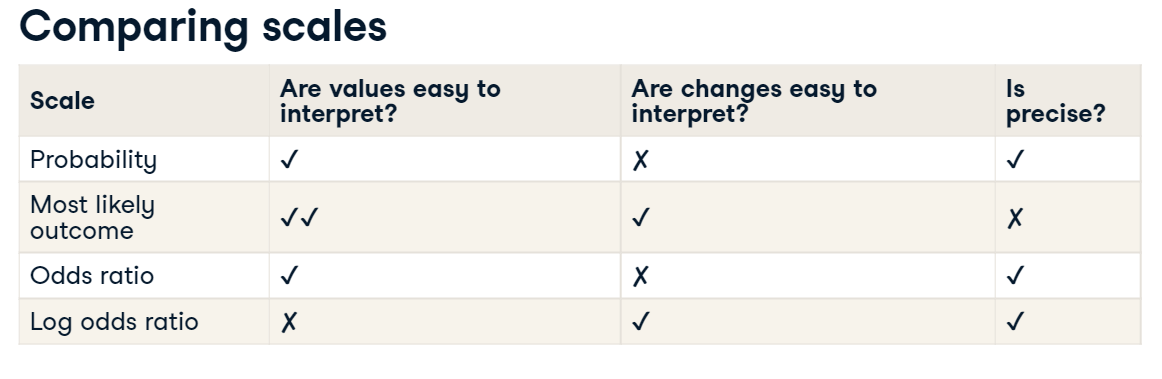

    Most likely outcome is easiest to understand because the answer is always yes or no, but this lacks precision.
    
     Probabilities and odds ratios are still fairly easy to understand for a data literate audience. However, the non-linear predictions make it hard to reason about how changes in the explanatory variable will change the response. Log odds ratio is difficult to interpret for individual values, but the linear relationship with the explanatory variables makes it easy to reason about changes.

### 4.4.1 Probabilities

There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. 

Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

In [9]:
'''
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x= "time_since_first_purchase", y = 'has_churned', data = churn, ci =None, logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot(x= "time_since_first_purchase", y = 'has_churned', data = prediction_data, color = "red")

plt.show()


'''

'\n# Create prediction_data\nprediction_data = explanatory_data.assign(\n    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)\n)\n\nfig = plt.figure()\n\n# Create a scatter plot with logistic trend line\nsns.regplot(x= "time_since_first_purchase", y = \'has_churned\', data = churn, ci =None, logistic = True)\n\n# Overlay with prediction_data, colored red\nsns.scatterplot(x= "time_since_first_purchase", y = \'has_churned\', data = prediction_data, color = "red")\n\nplt.show()\n\n\n'

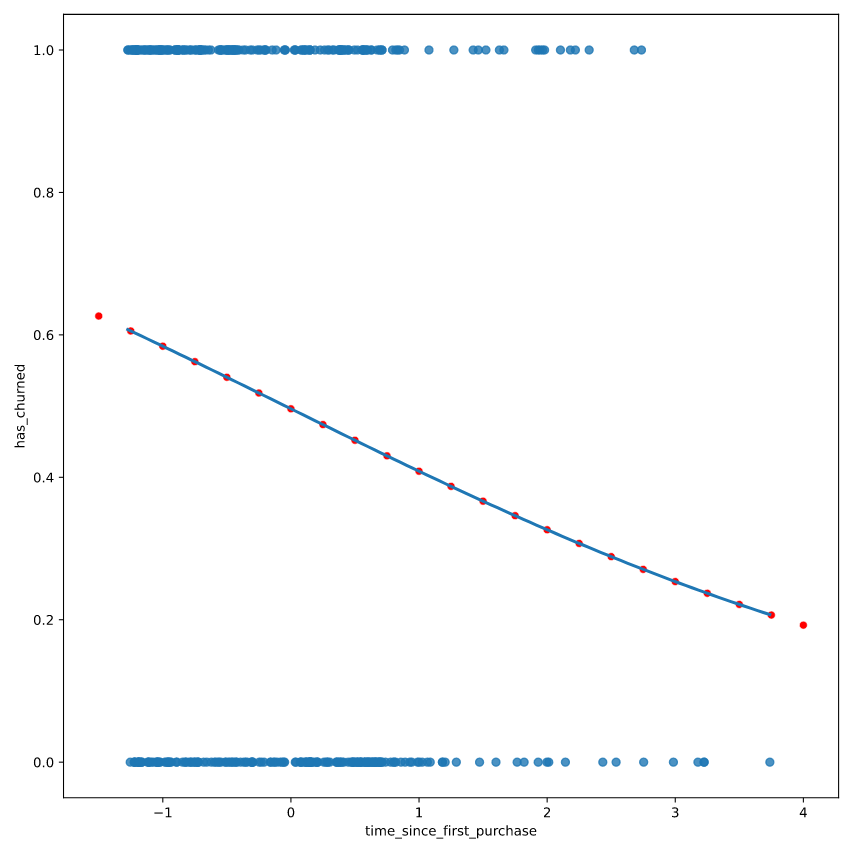

### 4.4.2 Most likely outcome

When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome.

That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

In [8]:
'''
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x= "time_since_first_purchase" , y= 'most_likely_outcome', data = prediction_data, color="red")

plt.show()


'''

'\n# Update prediction data by adding most_likely_outcome\nprediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])\n\nfig = plt.figure()\n\n# Create a scatter plot with logistic trend line (from previous exercise)\nsns.regplot(x="time_since_first_purchase",\n            y="has_churned",\n            data=churn,\n            ci=None,\n            logistic=True)\n\n# Overlay with prediction_data, colored red\nsns.scatterplot(x= "time_since_first_purchase" , y= \'most_likely_outcome\', data = prediction_data, color="red")\n\nplt.show()\n\n\n'

### 4.4.3 Odds ratio

Odds ratios compare the probability of something happening with the probability of it not happening. 

This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. 

For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

In [10]:
'''

# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = "time_since_first_purchase", y = "odds_ratio", data =prediction_data )

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

'''

'\n\n# Update prediction data with odds_ratio\nprediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])\n\nfig = plt.figure()\n\n# Create a line plot of odds_ratio vs time_since_first_purchase\nsns.lineplot(x = "time_since_first_purchase", y = "odds_ratio", data =prediction_data )\n\n# Add a dotted horizontal line at odds_ratio = 1\nplt.axhline(y=1, linestyle="dotted")\n\nplt.show()\n\n'

### 4.4.4 Log odds ratio

One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. 

This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. 

The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.


Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

In [11]:
'''
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()


'''

'\n# Update prediction data with log_odds_ratio\nprediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])\n\nfig = plt.figure()\n\n# Update the line plot: log_odds_ratio vs. time_since_first_purchase\nsns.lineplot(x="time_since_first_purchase",\n             y="log_odds_ratio",\n             data=prediction_data)\n\n# Add a dotted horizontal line at log_odds_ratio = 0\nplt.axhline(y=0, linestyle="dotted")\n\nplt.show()\n\n\n'

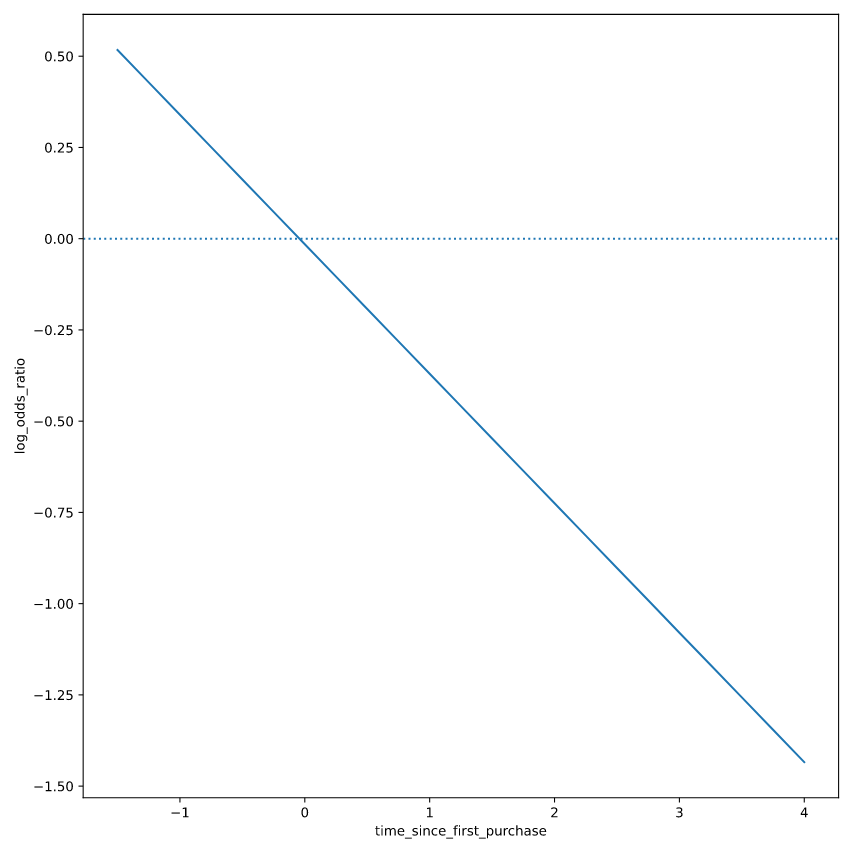

The linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.

### 4.5 Quantifying logistic regression fit


1. Quantifying logistic regression fit

        assess the performance of logistic regression models. The diagnostic plots we drew for linear models are less useful in the logistic case. Instead, we'll look at confusion matrices.

2. The four outcomes

    Good cases

    1. If the customer didn't churn and we predicted they wouldn't
    2. if they did churn and we predicted that, the model did well. 
    
    Bad cases
   
    1. Predicting the customer churned when they didn't is called a false positive. 
    2. Predicting the customer didn't churn when they did is called a false negative. The counts of each outcome are called a confusion matrix.
 
3. Confusion matrix: counts of outcomes
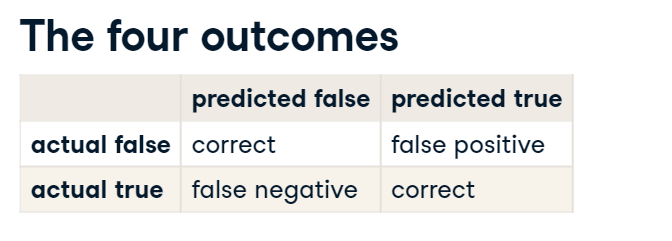

    Method 1: 

        actual_response = churn["has_churned"]
        predicted_response = np.round(mdl_recency.predict())

        outcomes = pd.DataFrame({"actual_response":actual_response, 
                                  "predicted_response": predicted_response})
        print(outcomes.value_counts(sort=False))

4. Visualizing the confusion matrix

    Method 2: 

        conf_matrix = mdl_recencu.pred_table()
        print(conf_matrix)

    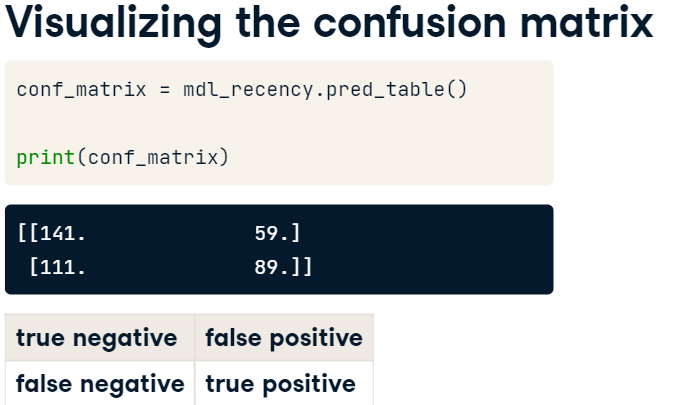

    Method 3: 

        from statsmodels.graphics.mosaicplot
        import mosaic

            mosaic(conf_matrix)

    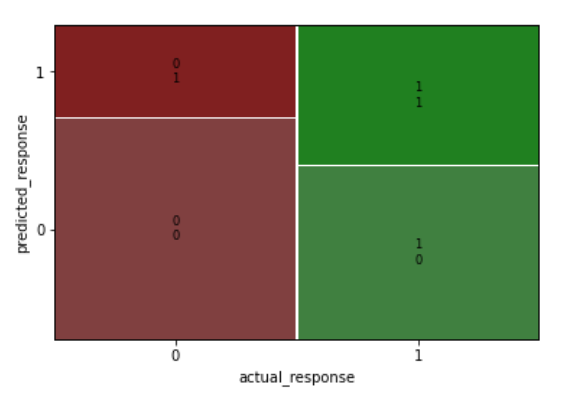    

        To interpret this, start by looking at the column widths. The width of each column is proportional to the fraction of observations in each category of actual values. Here, there are two hundred actual churns and two hundred actual not churns, so each column has the same width. Then each column displays the fraction of predicted observations with each value. Here, just over a quarter of the actual not churns were predicted to be churns, so the block in the upper left is just over a quarter of the height of the first column.
        
5. Accuracy

      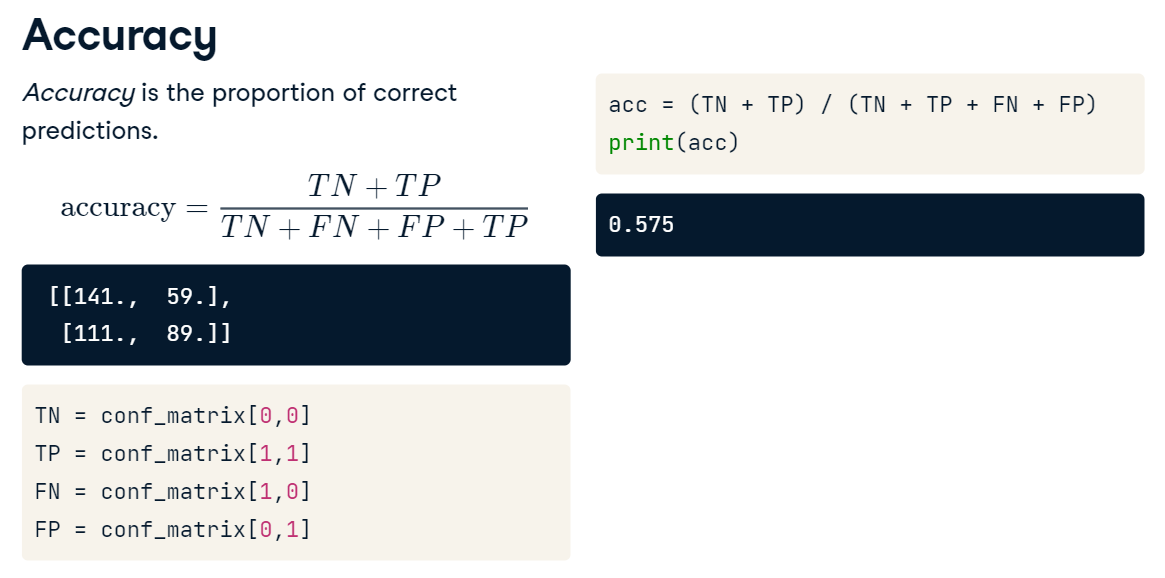
      
      - proportion of correct predictions.
      -  Higher accuracy is better. 

6. Sensitivity

    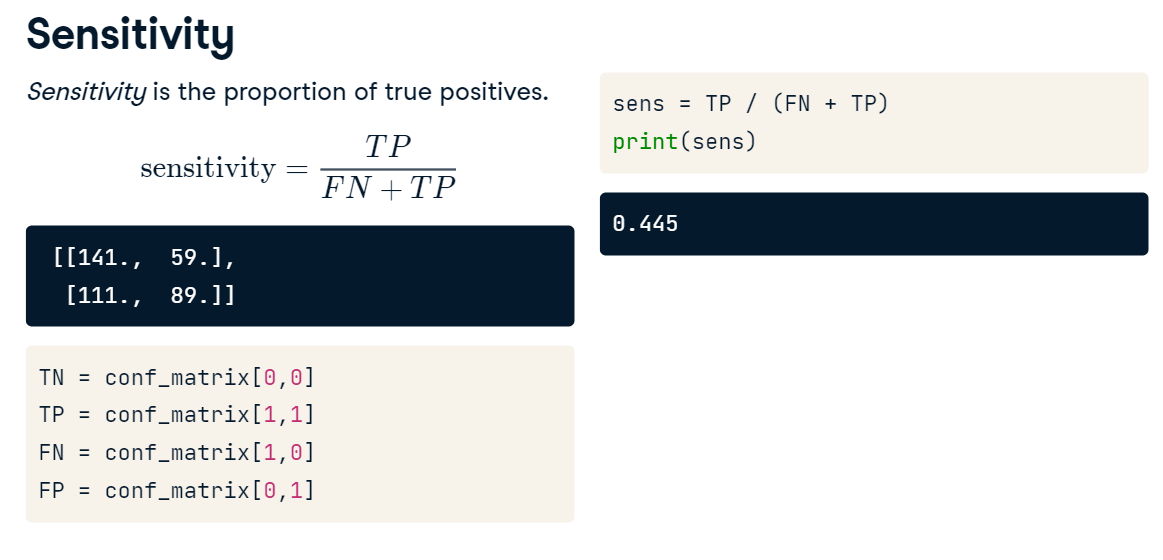
        
      - proportion of observations where the actual response was true where the model also predicted that they were true. 
      - Higher sensitivity is better. 

7. Specificity

    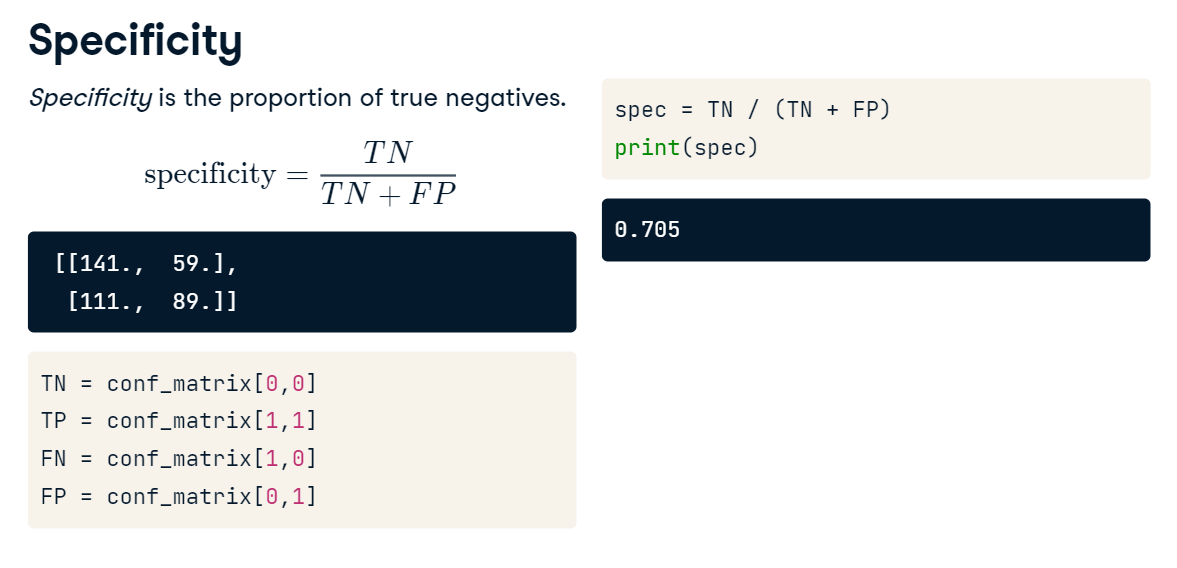

      - proportion of observations where the actual response was false where the model also predicted that they were false.
      - higher specificity is better, 
      - though there is often a trade-off where improving specificity will decrease sensitivity, or increasing sensitivity will decrease specificity

### 4.5.1 Calculating the confusion matrix

A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

    True positive: The customer churned and the model predicted they would.
    False positive: The customer didn't churn, but the model predicted they would.
    True negative: The customer didn't churn and the model predicted they wouldn't.
    False negative: The customer churned, but the model predicted they wouldn't.
    


In [12]:
'''# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict()) ##most likely outcome, round off

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response" : actual_response,
                         'predicted_response': predicted_response })

# Print the outcomes
print(outcomes.value_counts(sort = False))'''

'# Get the actual responses\nactual_response = churn["has_churned"]\n\n# Get the predicted responses\npredicted_response = np.round(mdl_churn_vs_relationship.predict()) ##most likely outcome, round off\n\n# Create outcomes as a DataFrame of both Series\noutcomes = pd.DataFrame({"actual_response" : actual_response,\n                         \'predicted_response\': predicted_response })\n\n# Print the outcomes\nprint(outcomes.value_counts(sort = False))'

### 4.5.2 Drawing a mosaic plot of the confusion matrix

While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the .pred_table() method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the mosaic() function.

In [13]:
'''
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()


'''

'\n# Import mosaic from statsmodels.graphics.mosaicplot\nfrom statsmodels.graphics.mosaicplot import mosaic\n\n# Calculate the confusion matrix conf_matrix\nconf_matrix = mdl_churn_vs_relationship.pred_table()\n\n# Print it\nprint(conf_matrix)\n\n# Draw a mosaic plot of conf_matrix\nmosaic(conf_matrix)\nplt.show()\n\n\n'

### 4.5.3 Accuracy, sensitivity, specificity

Lots of performance metrics can be computed from a confusion matrix. For logistic regression, three of them in particular are important: accuracy, sensitivity, and specificity. Can you identify what each of those terms mean in the context of the churn model?

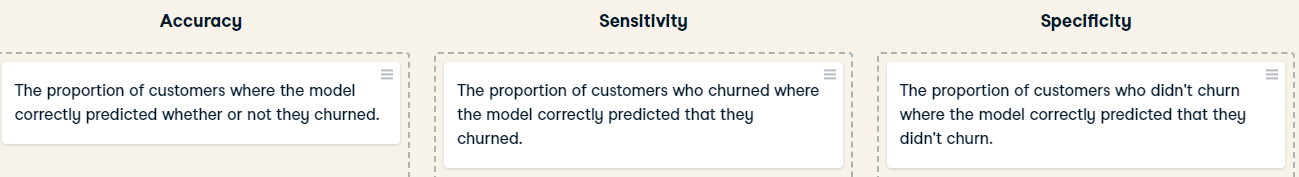

Accuracy, sensitivity, and specificity are the most important performance metrics for logistic regression models

### 4.5.4 Measuring logistic model performance

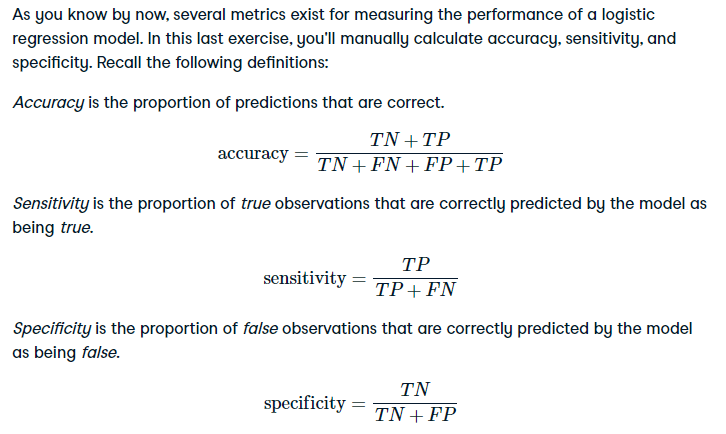

In [14]:
'''

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP)/ (TN + FN + FP +TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP /(TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

'''

'\n\n# Extract TN, TP, FN and FP from conf_matrix\nTN = conf_matrix[0,0]\nTP = conf_matrix[1,1]\nFN = conf_matrix[1,0]\nFP = conf_matrix[0,1]\n\n# Calculate and print the accuracy\naccuracy = (TN + TP)/ (TN + FN + FP +TP)\nprint("accuracy: ", accuracy)\n\n# Calculate and print the sensitivity\nsensitivity = TP /(TP + FN)\nprint("sensitivity: ", sensitivity)\n\n# Calculate and print the specificity\nspecificity = TN/(TN+FP)\nprint("specificity: ", specificity)\n\n'